#### == Capstone Project Modul 2 - Yunella Amelia Siagian - JCDS013 ==

# **Latar Belakang**

## Business Context

Sebuah perusahaan Airbnb yang bergerak di bidang penyediaan tempat penginapan meminta kita sebagai seorang *data analyst* untuk menganalisa data mengenai tempat penginapan yang ada di Bangkok, Thailand. Perusahaan ini memiliki daftar dataset tempat-tempat penginapan (_listings_) yang tersebar di beberapa lingkungan di Bangkok dengan tipe-tipe kamar yang berbeda.

Perusahaan ingin mengetahui tempat penginapan dengan tipe kamar bagaimana yang banyak tersedia di dataset daftar tempat penginapan yang dimiliki perusahaan. Informasi ini akan membantu perusahaan untuk mengetahui apakah daftar tempat penginapan yang ada dalam list Airbnb sudah sesuai/menjawab kebutuhan customer.

Tipe kamar yang tersedia dalam list yang dimiliki perusahaan ada 4 kategori yaitu : Entire home/apt, private room, hotel, dan shared room. Minimal masa inap/sewa untuk setiap tipe kamar tersebut adalah kurang-lebih untuk tipe Entire home/apt (21 malam), private room (9 malam), shared room (3 malam), dan hotel (1 malam). Minimal masa sewa yang durasinya paling lama, jumlah reviews nya justru banyak. Sebagai data analis, kita dapat menganalisa hal ini.

## Problem Statements

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut :

**Bagaimana tempat penginapan yang dicari para customer sehingga jumlah reviews tertinggi (197.943) justru diperoleh tempat penginapan dengan tipe kamar yang minimal sewanya justru paling lama (21 hari) ?**

## Goal/Tujuan

* Menginformasikan kepada perusahaan bagaimana **karakteristik tempat penginapan** yang menjadi kebutuhan customer
* **Merekomendasi suatu _sugestion_** sebagai tambahan/pendukung kepada perusahaan agar membooster para customer lebih antusias memberikan review sehingga jumlah review dari penginapan selain Entire room dapat meningkat, serta menghitung estimasi % keuntungan yang diperoleh perusahaan dari saran yang berikan

# **Data**

### Import Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import missingno
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest
from scipy.stats import kruskal
import warnings
warnings.filterwarnings("ignore")

### Input Data

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

Dataset yang ingin dianalisis adalah data Airbnb Listings Bangkok dimana dataset ini memiliki 16 kolom, yaitu :  

* `id`: ID unik Airbnb untuk setiap tempat
* `name`: nama tempat
* `host_id` : ID unik untuk identifikasi pemilik/(_owner_) tempat Airbnb
* `host_name`: nama owner (biasa hanya nama depan)
* `neighborhood` : lingkungan (memiliki kode geografis menggunakan garis lintang dan garis bujur setiap lingkungan)
* `latitude` : garis lintang (dari _World Geodetic System_ (WGS84))
* `longitude` : garis bujur (dari _World Geodetic System_ (WGS84))
* `room_type` : Setiap tempat dalam Airbnb dikategori menjadi 4 yaitu :
    - Entire Place/Apt (seluruh tempat/apartemen): penyewa dapat menikmati seluruh ruangan dalam rumah (kamar tidur, kamar mandi, dapur, dan pintu masuk sendiri).
    - Private rooms (kamar pribadi) : ruangan pribadi yang cocok untuk penyewa yang menginginkan privasi.
    - Shared rooms (kamar bersama) : diperuntukkan untuk penyewa yang tidak keberatan berbagi ruangan dengan orang lain. Tipe ini juga merupakan penginapan yang harganya murah (_budget-friendly_).
    - Hotel room : merupakan hotel pada umumnya.
* `price` : harga per malamnya ฿ (Thai Bāht / THB)
* `minimum_nights` : jumlah minimum durasi pemesanan (berapa malam)
* `number_of_reviews` : jumlah review yang dimiliki tempat tersebut
* `last_review` : tanggal review terakhir
* `reviews_per_month` : jumlah rata-rata ratings yang diterima per bulan untuk sebuah tempat
* `calculated_host_listings_count` : jumlah tempat penginapan yang dimiliki owner.
* `availability_365` : jumlah hari dimana tempat penginapan tersebut masih available/tersedia dalam satu tahun ke depan.
* `number_of_reviews_ltm` : jumlah review yang dimiliki tempat penginapan dalam 12 bulan terakhir (_last twelve months_).

Berikut ini tampilan 7 baris teratas dan terbawah dari dataset Airbnb Bangkok.

In [3]:
# Melihat data

display(df.head(7),df.tail(7))

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15847,790460406360583597,Family Room for 8 People,340188343,Rachan,Vadhana,13.740188,100.556291,Private room,2700,1,0,NaN,NaN,14,365,0
15848,790460476887978054,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,NaN,NaN,14,357,0
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [4]:
df.shape

(15854, 16)

Dataset Airbnb listing Bangkok ini memiliki 15.854 baris data dengan 16 kolom seperti keterangan di atas .

# **Data Understanding**

Sebelum melakukan analisa data, kita perlu mengenal terlebih dahulu terhadap dataset kita dengan melakukan pemeriksaan _missing values_ yang ada dalam dataset, melihat sekilas distribusi data, dan juga melihat anomali yang ada dalam dataset Airbnb Listing Bangkok ini.

Data understanding akan kita bagi berdasarkan data numerik dan data kategorik.

Pertama, kita melihat tipe data setiap kolomnya.

## Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

Kolom `last_review` masih berupa object dimana seharusnya _datetime_. Kita akan mengubahnya ke tipe data datetime.

In [6]:
# Mengubah kolom 'last_review' menjadi datetime

df['last_review'] = pd.to_datetime(df['last_review'])


In [7]:
# Memeriksa kembali type data perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

## Missing Values

### Jumlah Missing Values

Selanjutnya, kita memeriksa data kosong yang ada dalam dataset Airbnb Bangkok ini.

In [8]:
# Jumlah missing values setiap kolom

missing = df.isna().sum().sort_values(ascending = False)

pd.DataFrame({'jumlah_data_kosong':missing})

,jumlah_data_kosong
last_review,5790
reviews_per_month,5790
name,8
host_name,1
id,0
host_id,0
neighbourhood,0
latitude,0
longitude,0
room_type,0


Ternyata dalam dataset kita paling banyak data kosong (NaN) pada kolom `last_review` dan `reviews_per_month`. Ini sangat memungkinkan karena biasanya setiap customer tidak memprioritaskan mengisi review setelah mereka _check-out_ dari tempat penginapan. 

In [9]:
# Persentase missing values dari keseluruhan data

total_data = len(df)
presentase = missing / total_data * 100

pd.DataFrame({'presentase_data_kosong': presentase})

,presentase_data_kosong
last_review,36.520752
reviews_per_month,36.520752
name,0.050460
host_name,0.006308
id,0.000000
host_id,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


Terdapat 36,52 % data kosong pada kolom `last_review` dan `review_per_months`. Dan sangat sedikit data kosong pada kolom `name` dan `host_name` yaitu 0.05% dan 0.006%.

Selanjutnya kita akan memberikan perlakuan tertentu untuk meng-_handling_ data kosong yang ada tersebut.

### Hubungan Missing Values

<Axes: >

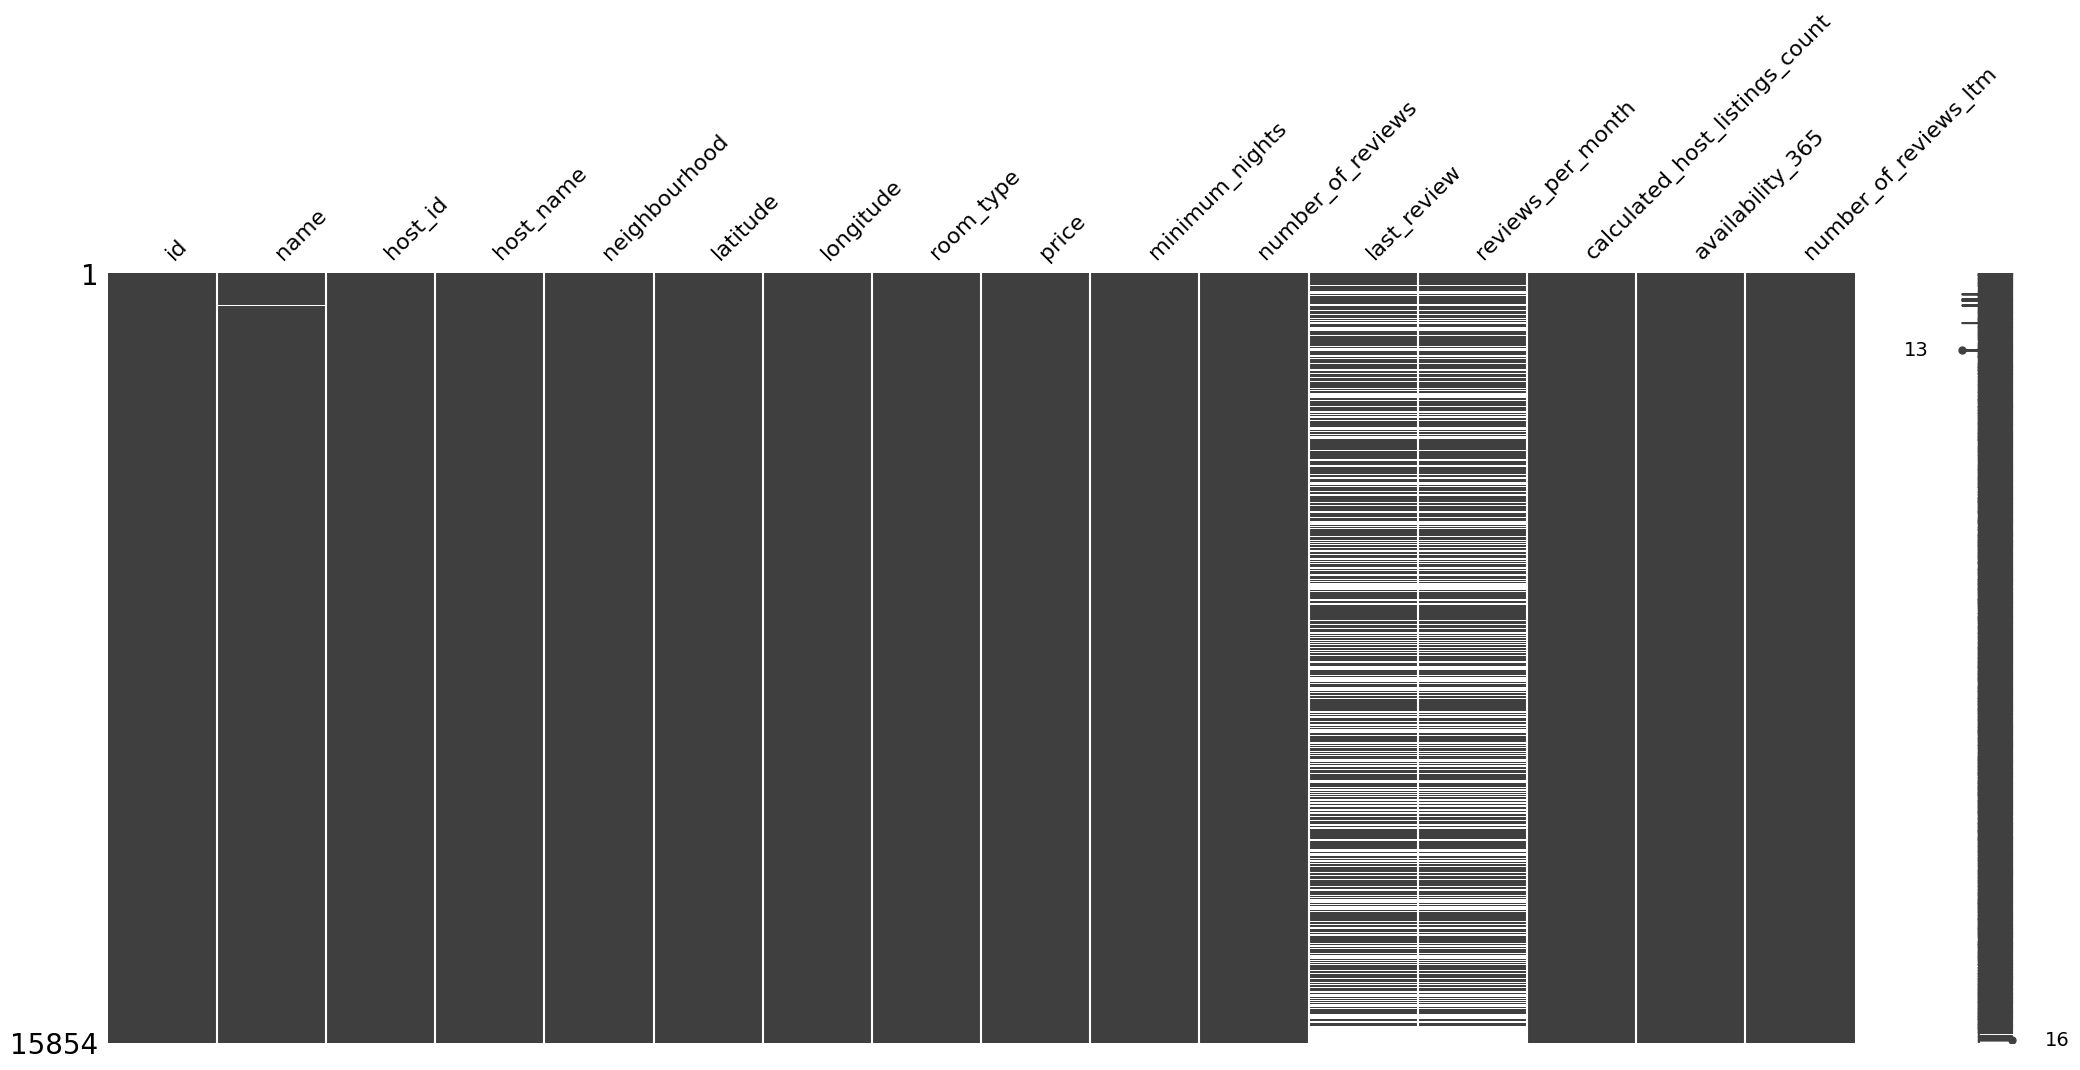

In [10]:
# Melihat marix missing values

missingno.matrix(df)

Jenis-jenis dari Missing Values yang terdapat dalam dataset ini, yaitu :

* Missing at Random (MAR) : pada kolom `last_review` dan `reviews_per_months` karena berkaitan dengan variabel lainnya yaitu kolom `number_of_reviews`. Kolom `last_review` dan `reviews_per_month`' hilang, disaat kolom `number_of_reviews` bernilai nol. 

* Missing Completely at Random (MCAR) : pada kolom `name` dan `host_name` benar-benar random, tidak ada kaitannya dengan apapun.

In [11]:
# Menampilkan data yang memiliki missing values pada kolom 'last_review'

df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Untuk menangani data NaN / missing values di atas kita dapat melakukan :
1. Melakukan 'dropna' atau menghapus semua baris yang memiliki data kosong. Namun, cara ini tidak tepat dan dihindari karena persentase data kosong pada kolom `last_review` dan `reviews_per_month` sangat tinggi yaitu **36,52 %**. Dan perlakukan _deletion_ juga akan menyebabkan kita kehilangan banyak informasi dari kolom lainnya.

2. Melakukan imputation dengan mengisi data kosong tersebut. Ini perlalukan yang lebih tepat. Pada data kosong di kolom `last_review` dan `reviews_per_month` kita akan mengisi setiap data kosong tersebut dengan 0 (nol) karena ini juga sesuai dengan kolom `number_of_reviews` yang memang berisi nol (yang berarti memang belum memiliki review).

Hal ini akan kita lakukan nanti pada bagian data cleaning selanjutnya.

In [12]:
# Menampilkan spesifik data yang memiliki missing values pada kolom 'name'

df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [13]:
# Menampilkan spesifik data yang memiliki missing values pada kolom 'host_name'

df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Untuk menangani data NaN / missing values di kolom `name` dan `host_name` kita dapat melakukan :
1. Menghapus semua baris yang memiliki data kosong. Cara ini dipilihmemungkinkan untuk dilakukan karena data kosong di kolom `name` ternyata juga memiliki data kosong di kolom `last_review` dan `review_per_months`, dan proporsi data kosong untuk 2 kolom ini juga sangat kecil yaitu **0.05 % dan 0.006 %** yang jika kita bulatkan juga masih 0 sehingga asumsi bahwa dengan menghapus data kosong ini tidak akan menyebabkan kita akan kehilangan informasi yang besar.

2. Imputation dengan mengisi data kosong dengan 'unknown'. Walaupun proporsi data kosong untuk 2 kolom ini sangat kecil yaitu 0.05 % dan 0.006 % namun pilihan untuk tidak menghapus baris tetap lebih baik agar tidak ada data yang kita buang.

Pilihan kedua adalah cara handling missing value yang paling tepat. Kita lakukan pada bagian data cleaning selanjutnya.

## Data Numerik

### Statistika Deskriptif

In [14]:
# Melihat ringkasan statistik deskriptif data numerik

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


Dimana setiap baris atas berisi informasi :
* `count` : jumlah data (baris)
* `mean` : rata-rata
* `std` : standar deviasi
* `min` : nilai paling kecil
* `25%` : Kuartil 1 (Q1)
* `50%` : Kuartil 2 (Q2) / Median
* `75%` : Kuartil 3 (Q3)
* `max` : nilai paling besar

Data set yang kita miliki ini berisi informasi tempat penginapan / listings yang ada di Bangkok mulai dari nama tempanya, nama ownernya, letak geografis lingkungannya, harga per malamnya, minimum masa sewanya, jumlah reviewnya, ratings yang diberikan, berapa banyak tempat penginapan yang dimiliki oleh seorang owner, dan jumlah hari yang masih available untuk 1 tahun ke depan. Dan informasi secara statistika deskriptif dari count, mean, dan seterusnya hingga data maximal dapat dilihat dari tabel diatas yang diperoleh dari fungsi describe().

### Distribusi Data

In [15]:
# Memilih data yang isinya hanya numerik

numerik = df.select_dtypes(include = 'number')
numerik

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,120437,13.759830,100.541340,1905,3,65,0.50,2,353,0
1,27979,120541,13.668180,100.616740,1316,1,0,NaN,2,358,0
2,28745,123784,13.752320,100.624020,800,60,0,NaN,1,365,0
3,35780,153730,13.788230,100.572560,1286,7,2,0.03,1,323,1
4,941865,610315,13.768720,100.633380,1905,1,0,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,94899359,13.715132,100.653458,2298,28,0,NaN,1,362,0
15850,790474503157243541,491526222,13.753052,100.538738,1429,1,0,NaN,14,365,0
15851,790475335086864240,491526222,13.753169,100.538700,1214,1,0,NaN,14,365,0
15852,790475546213717328,491526222,13.754789,100.538757,1214,1,0,NaN,14,365,0


In [16]:
# mengambil nama kolom 
numerik.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [17]:
# kita akan mem-visualisasikan semua data kecuali kolom 'id', 'host_id' karena berupa data id

numerik1 = numerik[['latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]

Selanjutnya kita coba melihat distribusi data dengan visualisasi data menggunakan Grafik Histogram & Boxplot.

#### Grafik Histogram

Kita akan lihat distribusi data untuk semua kolom numerik kecuali kolom 'id', 'host_id' karena berupa kolom id saja.

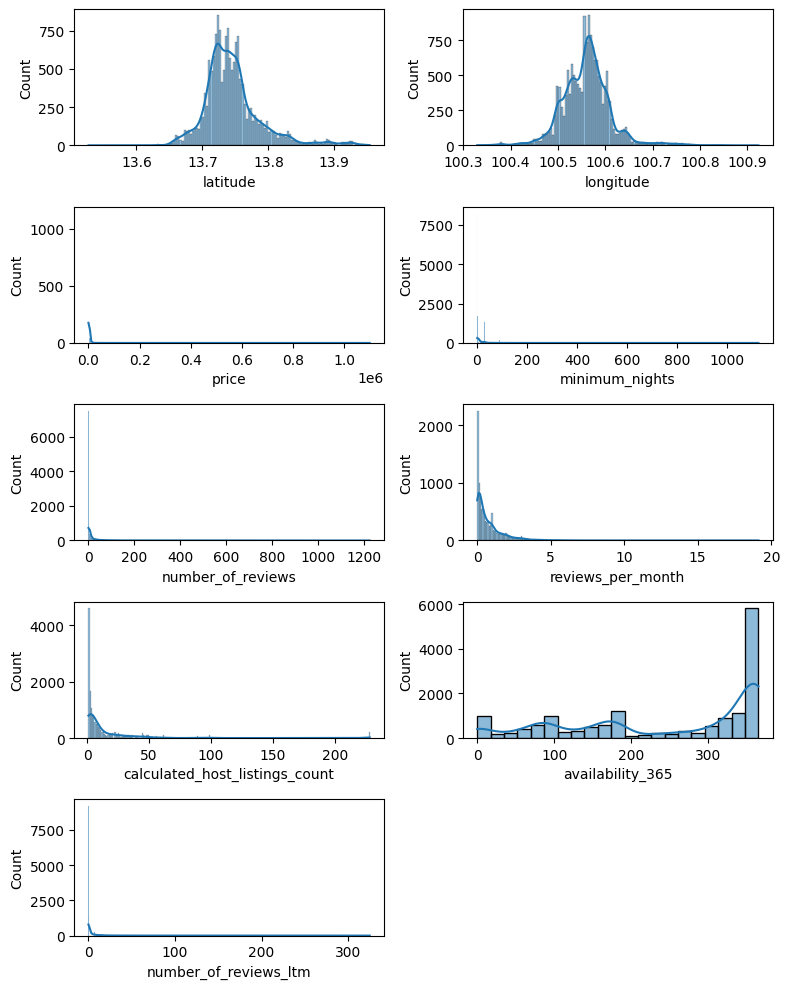

In [18]:
fig = plt.figure(figsize=(8,10)) 
posisi = 1

for kolom in numerik1.columns:
  plt.subplot(5,2,posisi)
  sns.histplot(numerik[kolom], kde = True) 
  fig.tight_layout()

  posisi += 1

plt.show()

Dari visualisasi data dengan grafik histogram kita melihat bahwa overall distribusi data kita tidak terdistribusi normal atau skewed.

* `latitude` : terlihat normal, hal ini wajar karena data berupa garis lintang letak geografisnya
* `longitude` : terlihat normal, hal ini wajar karena data berupa garis bujur letak geografisnya
* `price` : tidak normal -> skew kanan
* `minumum nights` : tidak normal -> skew kanan
* `number_of_reviews` : tidak normal -> skew kanan 
* `review_per_month` : tidak normal -> skew kanan 
* `calculated_host_listings_count` : tidak normal -> skew kanan
* `availability_365` : diskrit bukan continuous
* `number_of_reviews_ltm` : tidak normal -> skew kanan

#### Grafik Boxplot

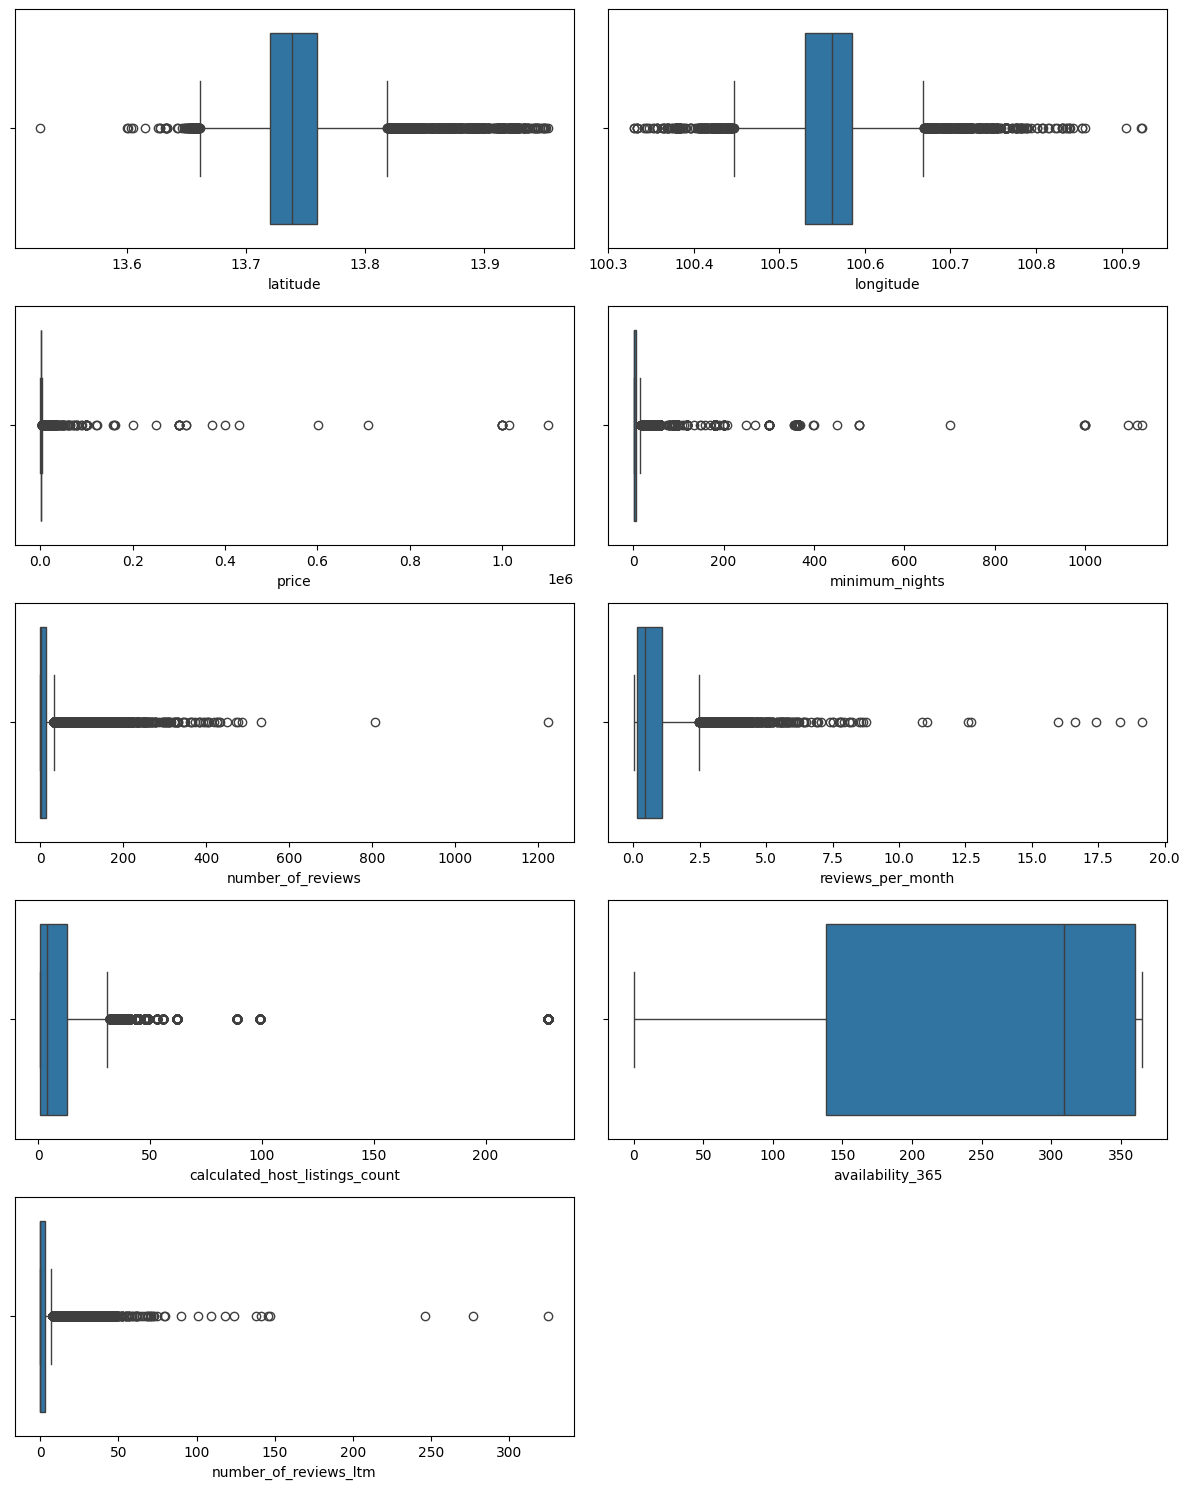

In [19]:
fig = plt.figure(figsize=(12,15))
posisi = 1

for kolom in numerik1.columns:
  plt.subplot(5,2,posisi) # (berapa baris, berapa kolom, di urutan ke berapa)
  sns.boxplot(x = numerik[kolom])
  fig.tight_layout()

  posisi += 1

plt.show()

Dari visualisasi data dengan boxplot, kita melihat bahwa data kita memiliki anomali atau outliers yang cukup banyak. Selanjutnya kita akan memeriksa data anomali tersebut dengan melihat Inter Quartile Range (IQR)nya.

### Inter Quartile Range (IQR)

In [20]:
for kolom in numerik1.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float((q3 + whis).iloc[0])
  lower_bound = float((q1 - whis).iloc[0])

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f'`{kolom}` memiliki outliers sebanyak : {jumlah_outliers}')

`latitude` memiliki outliers sebanyak : 1095
`longitude` memiliki outliers sebanyak : 602
`price` memiliki outliers sebanyak : 1403
`minimum_nights` memiliki outliers sebanyak : 3168
`number_of_reviews` memiliki outliers sebanyak : 2240
`reviews_per_month` memiliki outliers sebanyak : 693
`calculated_host_listings_count` memiliki outliers sebanyak : 1832
`availability_365` memiliki outliers sebanyak : 0
`number_of_reviews_ltm` memiliki outliers sebanyak : 2219


Dari jumlah total 15854 data, kita memiliki data anomali tertinggi di kolom `minimum_nights` sebanyak 3168 (sekitar 20%). Namun data anomali ini masih dinilai cukup wajar karena setiap tempat penginapan pasti memiliki ketentuan dari setiap owner masing-masing terkait minimum masa sewa. Pada tahapan data understanding ini, kita asumsikan data anomali yang ada pada dataset masih bersifat normal.

### Korelasi

In [21]:
# karena data kita memiliki outliers kita menggunakan metode 'spearman' untuk melihat korelasi antar variabelnya.

numerik.corr(method = 'spearman')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.513981,0.010070,0.016332,0.077390,-0.014021,-0.268581,0.352999,0.250315,-0.023742,0.127723
host_id,0.513981,1.000000,0.071296,0.013164,0.025219,-0.120579,-0.264099,0.050886,0.027658,0.010728,-0.064100
latitude,0.010070,0.071296,1.000000,-0.061282,-0.047724,-0.096306,-0.048682,-0.028465,-0.019436,0.016674,-0.081968
longitude,0.016332,0.013164,-0.061282,1.000000,-0.069085,0.099712,-0.051086,-0.030730,-0.112823,-0.018779,-0.034402
price,0.077390,0.025219,-0.047724,-0.069085,1.000000,-0.102200,-0.020659,0.136806,0.084520,-0.000549,0.043726
minimum_nights,-0.014021,-0.120579,-0.096306,0.099712,-0.102200,1.000000,0.036323,-0.065629,-0.127058,-0.124878,0.012733
number_of_reviews,-0.268581,-0.264099,-0.048682,-0.051086,-0.020659,0.036323,1.000000,0.597364,0.221142,-0.264044,0.705412
reviews_per_month,0.352999,0.050886,-0.028465,-0.030730,0.136806,-0.065629,0.597364,1.000000,0.239922,-0.114746,0.713749
calculated_host_listings_count,0.250315,0.027658,-0.019436,-0.112823,0.084520,-0.127058,0.221142,0.239922,1.000000,-0.054202,0.276462
availability_365,-0.023742,0.010728,0.016674,-0.018779,-0.000549,-0.124878,-0.264044,-0.114746,-0.054202,1.000000,-0.212874


<Axes: >

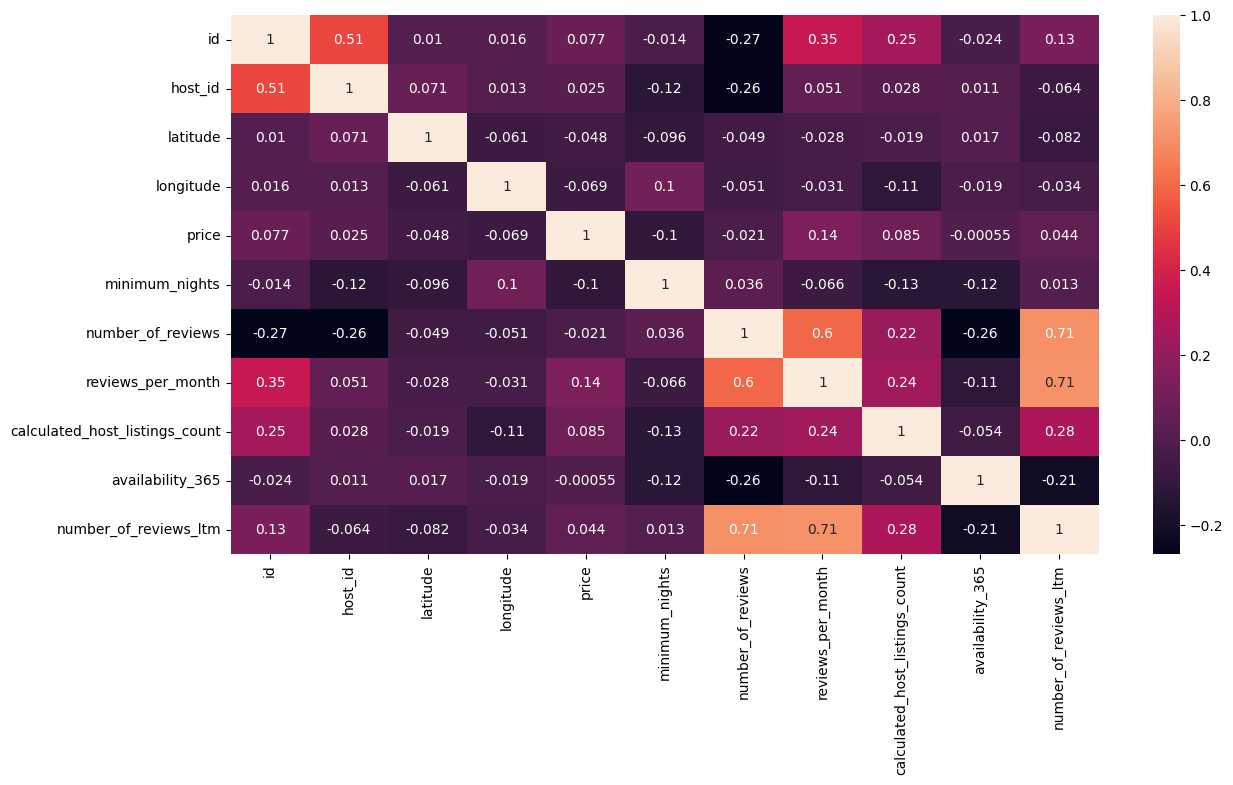

In [22]:
# Visualisai korelasi

plt.figure(figsize=(14,7))
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

Pemahaman yang dapat jelas terlihat bahwa variabel `number_of_review` berkorelasi tinggi dengan `reviews_per_month` dan `number_of_reviews_ltm`. Hal tersebut sangat wajar karena ketiga variabel tersebut bergantung dengan banyaknya review.
Hal yang cukup menarik bahwa harga `price` berkorelasi tertinggi terhadap dengan `id` dan `calculated_host_listings_count` dimana berarti harga tersebut sangat bergantung/dipengaruhi oleh pemiliknya dan bertentangan (nilai korelasi minus) terhadap lingkungan yang dilihat dari `longitude` dan `latitude`nya. Padahal pada umumnya kita ketahui bahwa harga sangat dipengaruhi oleh lingkungan. Dalam hal ini, kita pahami bahwa lingkungan yang dimaksud adalah lingkungan yang sudah sesuai perkembangan saat ini (misal daerah perkotaan, pekembangan metropolitan, dan sebagainya) bukan berdasarkan letak geografisnya.

## Data Kategorik

Kita coba memahami data kategorik dari dataset yang kita miliki.

In [23]:
# Kita simpan data kategorik dalam variabel kategorik

kategorik = df.select_dtypes(include = 'object')
kategorik.head()

,name,host_name,neighbourhood,room_type
0,Nice room with superb city view,Nuttee,Ratchathewi,Entire home/apt
1,"Easy going landlord,easy place",Emy,Bang Na,Private room
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,Private room
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,Private room


In [24]:
# Melihat ringkasan statistik deskriptif data kategorik

kategorik.describe(include = 'object')

,name,host_name,neighbourhood,room_type
count,15846,15853,15854,15854
unique,14794,5312,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


### Kardinalitas (Perbedaan Jumlah Unique Values)

Text(0.5, 1.0, 'Unique Values')

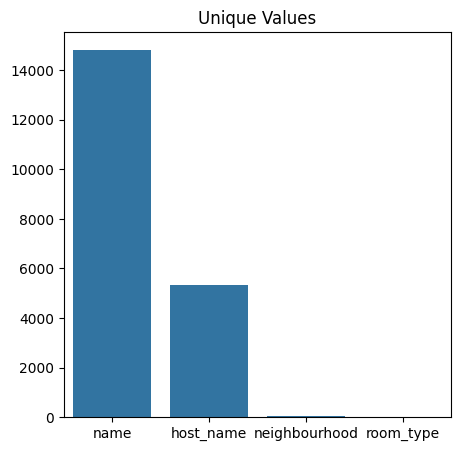

In [25]:
# Visualisasi dengan Seaborn

plt.figure(figsize = (5,5))
sns.barplot(x = kategorik.nunique().index, y = kategorik.nunique().values)
plt.xlabel('')
plt.title('Unique Values')

In [26]:
kategorik.nunique()

name             14794
host_name         5312
neighbourhood       50
room_type            4
dtype: int64

In [27]:
kategorik['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

Dataset kita memiliki 14.794 nama tempat penginapan Airbnb yang dikelola oleh 5312 owner yang berada pada 50 lingkungan tersebar di Bangkok dengan 4 tipe kamar yaitu 'Entire home/apt', 'Private room', 'Hotel room', 'Shared room'.

### Value Counts

In [28]:
#Mengambil nama-nama kolom pada data kategorik

kategorik.columns

Index(['name', 'host_name', 'neighbourhood', 'room_type'], dtype='object')

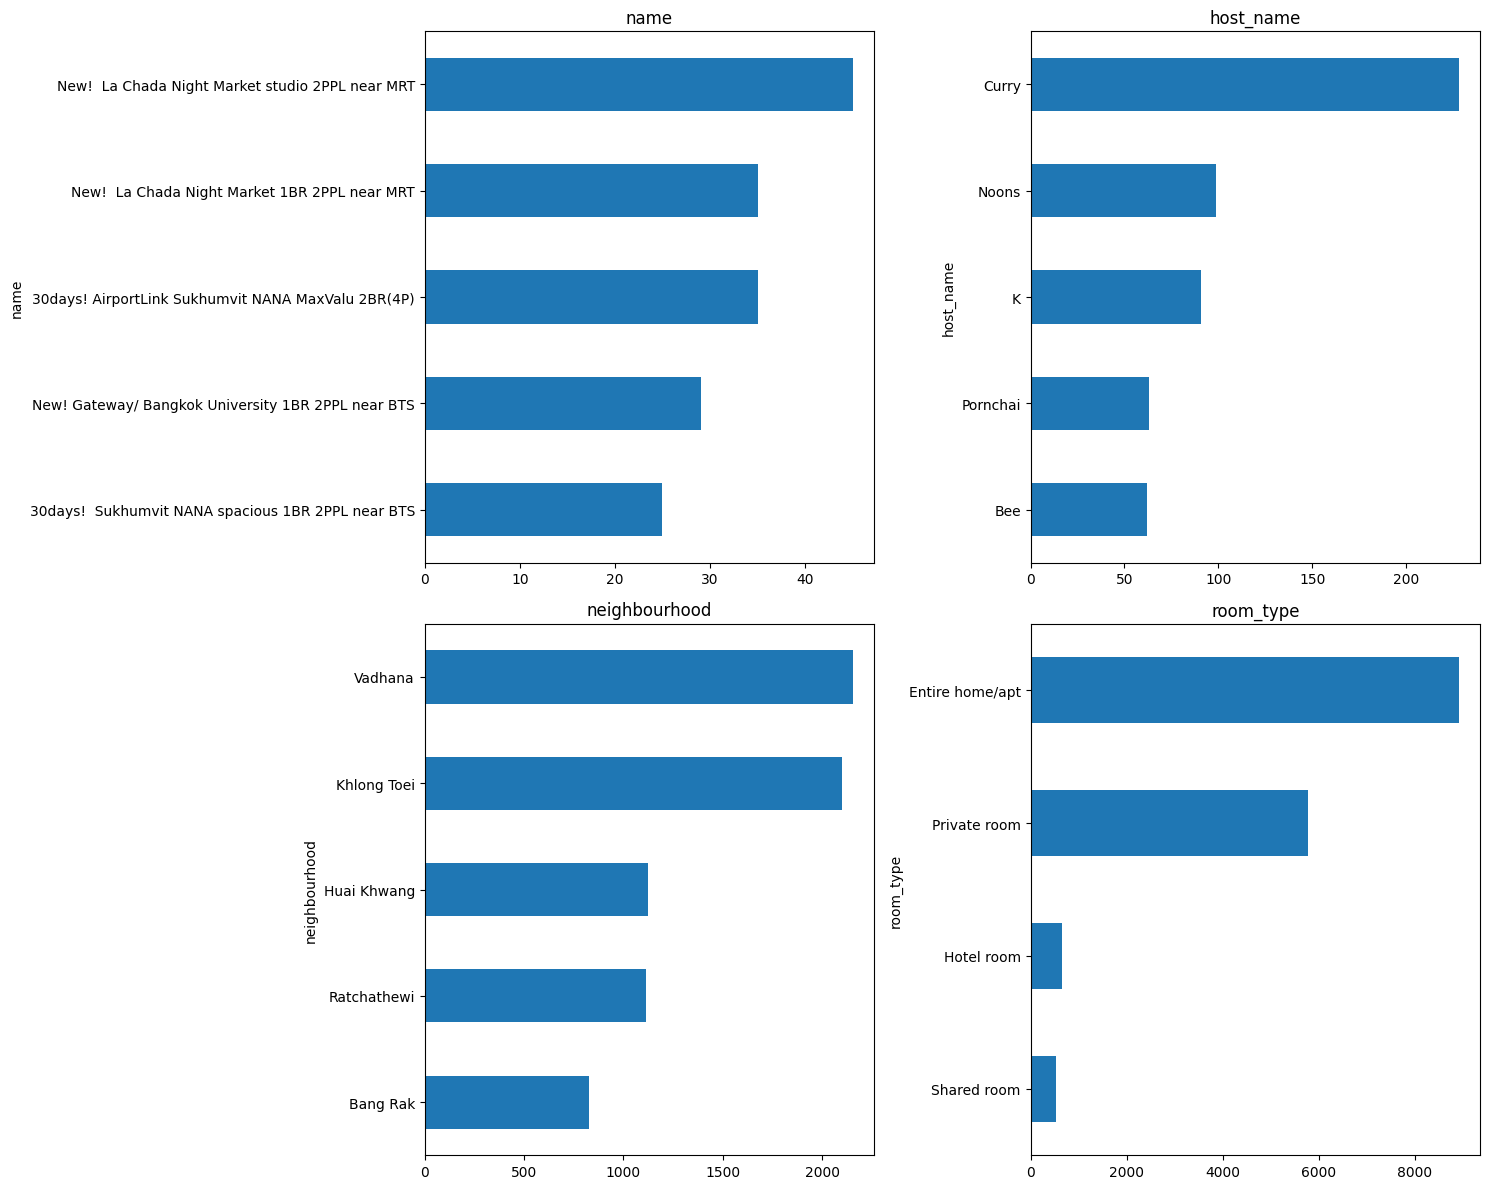

In [29]:
fig = plt.figure(figsize=(15,12))
count = 1

for kolom in kategorik.columns:
  plt.subplot(2,2,count)
  kategorik[kolom].value_counts().head(5).sort_values().plot(kind = 'barh')
  fig.tight_layout()
  count +=1
  plt.title(f'{kolom}')
plt.show()

Nama penginapan dengan data terbanyak adalah __New! La Chada Night Market studio 2PPL near MRT__. Lingkungan yang menyediakan tempat penginapan terbanyak adalah __Varhana__. Owner yang memili banyak tempat penginapan adalah __Mr/Mrs. Curry__. Dan tipe kamar yang paling banyak tersedia adalah __Entire home/apt__.

# **Data Cleaning**

In [30]:
# untuk menyimpan data sebelum dibersihkan

df_prep = df.copy()

In [31]:
df_prep.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,NaN,3,365,0


## Handling Missing Values

In [32]:
# Jumlah dan Persentase missing values dari keseluruhan data

missing = df_prep.isna().sum().sort_values(ascending = False)

total_data = len(df_prep)
presentase = missing / total_data * 100

pd.DataFrame({'jumlah':missing, 'presentase': presentase})

,jumlah,presentase
last_review,5790,36.520752
reviews_per_month,5790,36.520752
name,8,0.050460
host_name,1,0.006308
id,0,0.000000
host_id,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000


<Axes: >

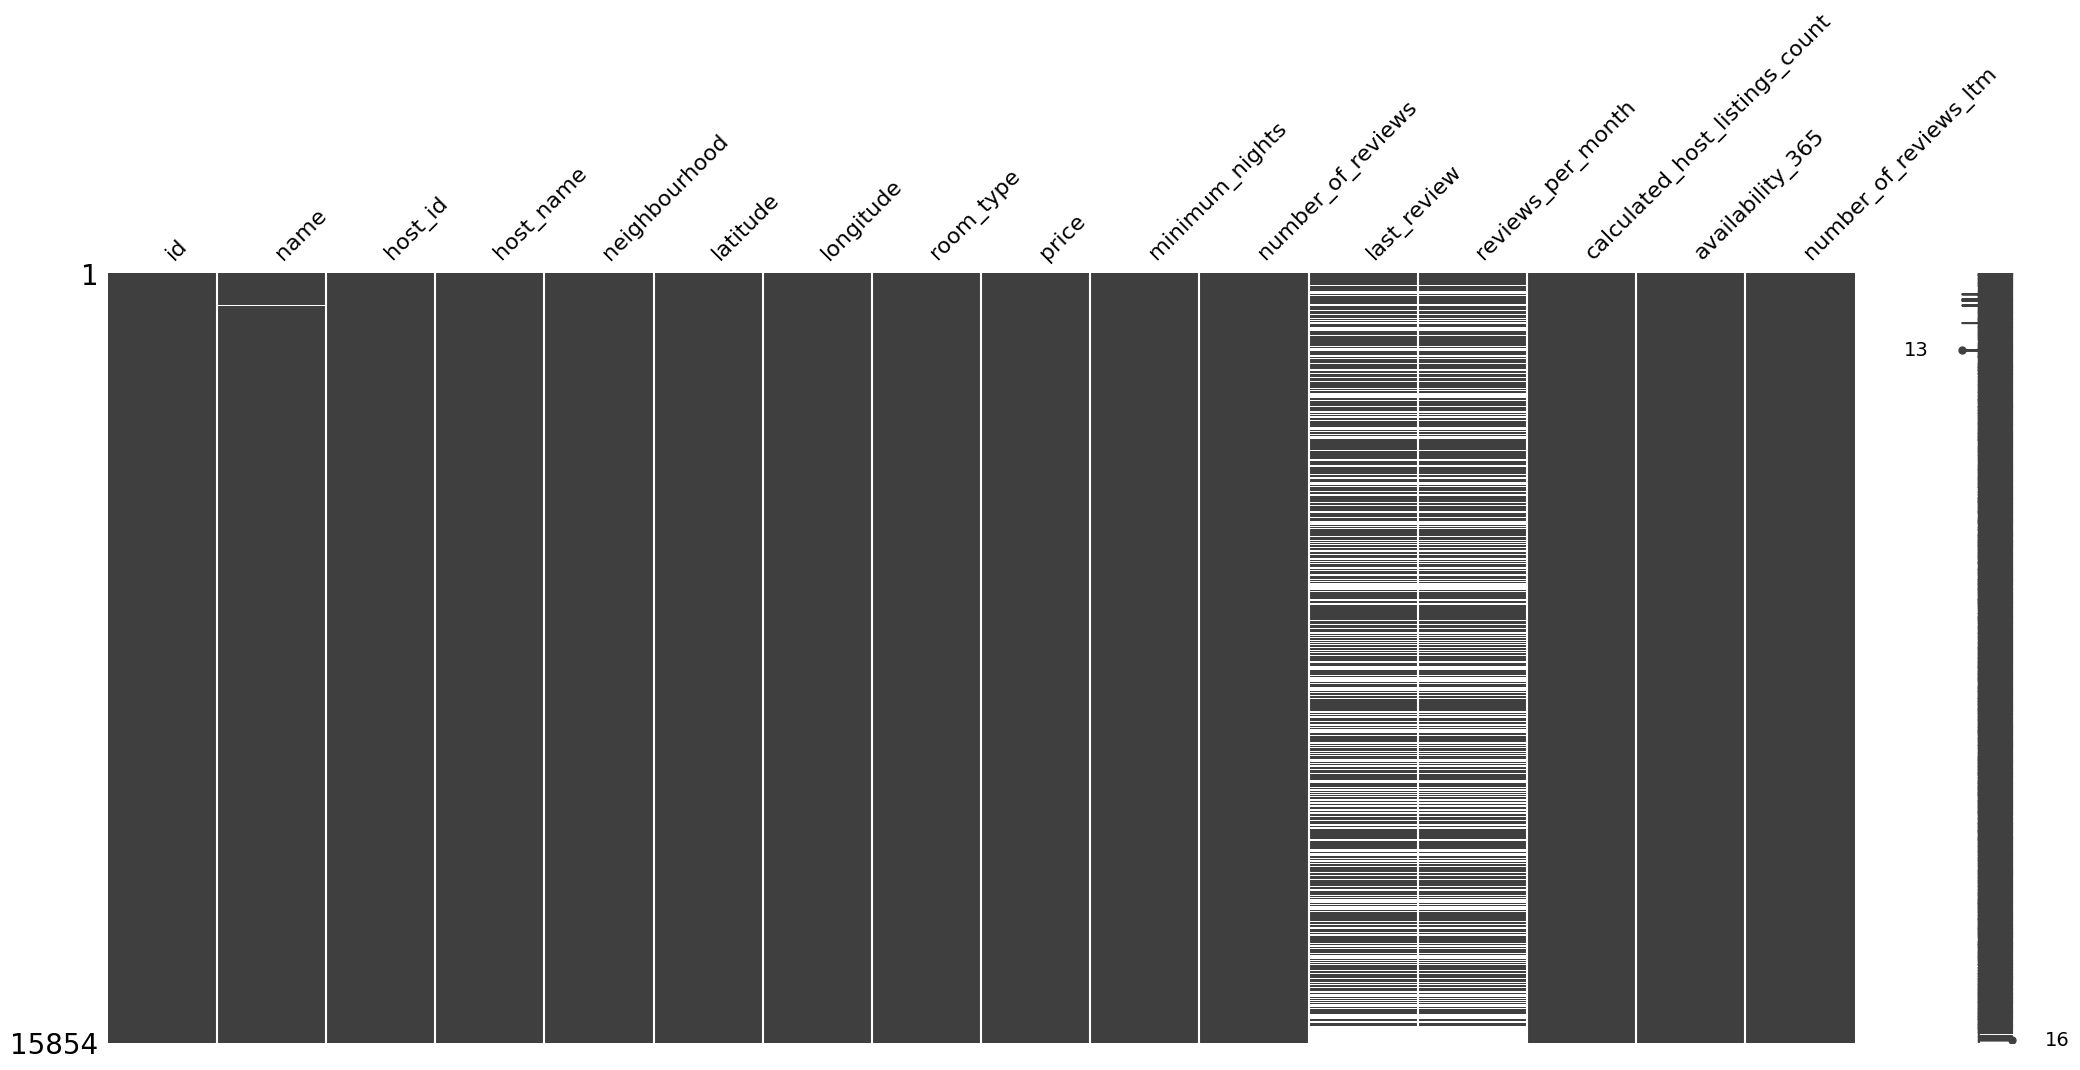

In [33]:
missingno.matrix(df_prep)

Berdasarkan bagian *Data Understanding* sebelumnya, kita telah memahami bahwa dataset kita memiliki data kosong yang bersifat tidak random pada kolom `last_review` dan `reviews_per_month`. Data kosong yang bersifat random ada pada kolom `name` dan `host_name`.

In [34]:
# Menampilkan data yang memiliki missing values pada kolom 'last_review'

df_prep[df_prep['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Untuk menangani data NaN / missing values data di atas kita akan melakukan imputation karena :

1. Pilihan 'dropna' atau menghapus semua baris data kosong sebenarnya dapat saja kita lakukan. Namun, cara ini tidak tepat dan dihindari karena persentase data kosong pada kolom `last_review` dan `review_per_months` sangat tinggi yaitu **36,52 %**. Dan perlakukan _deletion_ juga akan menyebabkan kita kehilangan banyak informasi dari kolom lainnya.

2. Melakukan imputation dengan mengisi data kosong tersebut adalah perlalukan yang lebih tepat. Pada data kosong di kolom `last_review` dan `reviews_per_month` kita akan mengisi setiap data kosong tersebut dengan 0 (nol) karena ini juga sesuai dengan kolom `number_of_reviews` yang memang berisi nol (yang berarti memang belum memiliki review).

In [35]:
# Memasukkan nilai konstan untuk data yang NaN pada kolom `last_review`

df_prep['last_review'] = df_prep['last_review'].fillna(0)
df_prep.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [36]:
# Memasukkan nilai konstan untuk data yang NaN pada kolom `reviews_per_month`

df_prep['reviews_per_month'] = df_prep['reviews_per_month'].fillna(0)
df_prep.isna().sum()

id                                0
name                              8
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [37]:
# Menampilkan spesifik data yang memiliki missing values pada kolom 'name'

df_prep[df_prep['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,0,0.00,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,0,0.00,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,0,0.00,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,0,0.00,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,0,0.00,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13 00:00:00,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,0,0.00,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11 00:00:00,0.03,3,220,0


In [38]:
# Menampilkan spesifik data yang memiliki missing values pada kolom `host_name`

df_prep[df_prep['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29 00:00:00,0.02,1,365,0


Untuk menangani data NaN / missing values di kolom `name` dan `host_name` kita akan melakukan : imputation dengan mengisi data kosong dengan 'unknown'. 
Walaupun proporsi data kosong untuk 2 kolom ini  sangat kecil yaitu 0.05 % dan 0.006 % namun pilihan untuk tidak menghapus baris tetap lebih baik sehingga tidak ada data yang kita buang.

In [39]:
# Memasukkan nilai konstan untuk data kosong pada kolom `name` dan `host_name`

df_prep['name']= df_prep['name'].fillna('Unknown')
df_prep['host_name']= df_prep['host_name'].fillna('Unknown')
df_prep.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Handling Outliers

In [40]:
# Melihat kembali banyaknya outliers

for kolom in numerik1.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float((q3 + whis).iloc[0])
  lower_bound = float((q1 - whis).iloc[0])

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f'`{kolom}` memiliki outliers sebanyak : {jumlah_outliers}')

`latitude` memiliki outliers sebanyak : 1095
`longitude` memiliki outliers sebanyak : 602
`price` memiliki outliers sebanyak : 1403
`minimum_nights` memiliki outliers sebanyak : 3168
`number_of_reviews` memiliki outliers sebanyak : 2240
`reviews_per_month` memiliki outliers sebanyak : 693
`calculated_host_listings_count` memiliki outliers sebanyak : 1832
`availability_365` memiliki outliers sebanyak : 0
`number_of_reviews_ltm` memiliki outliers sebanyak : 2219


In [41]:
# melihat jumlah total data

df.shape

(15854, 16)

Dari jumlah total 15854 data, kita memiliki data anomali tertinggi di kolom `minimum_nights` sebanyak 3168 (20%). Namun data anomali ini masih dinilai cukup wajar karena setiap tempat penginapan pasti memiliki ketentuan masing-masing dari setiap owner terkait minimal masa sewa untuk setiap pemesanan.

Data anomali terbanyak kedua terdapat pada kolom `number_of_reviews` sebanyak 2240 (14%) dan ini juga dinilai cukup wajar. Berdasarkan Help Center Airbnb https://www.airbnb.com/help/article/13#:~:text=for%20on%20Airbnb.-,When%20can%20reviews%20be%20submitted%20and%20published,a%20review%20for%20the%20stay., dikatakan bahwa pemberian rating/ulasan yaitu batas 14 hari maksimal sejak keluar (check-out) dari tempat penginapan. Oleh karena itu, anomali pada kolom ini masih dinilai wajar karena mungkin saja customer/penyewa tidak langsung memberikan ulasan dalam rentang waktu 14 hari tersebut, dan bahkan akhirnya lupa untuk memberikan review sehingga banyak review yang kosong.

Pada tahapan data cleaning ini, kita asumsikan data anomali yang ada pada setiap kolom dataset ini masih normal/wajar sehingga tidak ada data yang kita buang/hapus. Seluruh data akan kita pakai untuk analisa selanjutnya.

### Data Bersih

In [42]:
df_prep.shape

(15854, 16)

Sekarang dataset kita telah bersih dengan jumlah data yang masih sama dengan sebelumnya yaitu 15854 baris data dengan 16 kolom karena tidak ada data yang kita hapus. Selanjutnya dataset bersih ini telah siap untuk kita lakukan analisis selanjutnya. Dataset yang sudah bersih ini kita simpan ke file .csv

In [43]:
df_prep.to_csv('Airbnb_listings_Bangkok_clean.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [44]:
dfc = pd.read_csv('Airbnb_listings_Bangkok_clean.csv')

In [45]:
dfc.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0.00,3,365,0


### Bangkok

In [35]:
bangkok_map = folium.Map(
            location = [13.736717, 100.523186], # lokasi titik
            zoom_start = 12)

folium.Marker(
                ['13.736717', '100.523186'],
                popup = "Hi!", # text yang keluar ketika di klik
                tooltip = 'Klik saya!' # text ketika mouse mengarah ke marker
            ).add_to(bangkok_map)

for i in range(len(dfc.head(10))):
    folium.Marker(
                [dfc['latitude'].iloc[i], dfc['longitude'].iloc[i]],
                popup = dfc['host_name'].iloc[i],
                tooltip = dfc['price'].iloc[i],
                icon = folium.Icon(color = 'red', icon = 'home')
            ).add_to(bangkok_map)

bangkok_map

Pada analisa awal, kita coba mengurutkan lingkungan dengan data tempat penginapan/listing terbanyak hingga terendah.

In [46]:
dfc.groupby('neighbourhood').agg({'name':'count'}).sort_values('name', ascending=False)

,name
neighbourhood,
Vadhana,2153
Khlong Toei,2097
Huai Khwang,1125
Ratchathewi,1114
Bang Rak,827
Sathon,809
Phra Nakhon,619
Phra Khanong,558
Chatu Chak,548


<Axes: xlabel='neighbourhood', ylabel='count'>

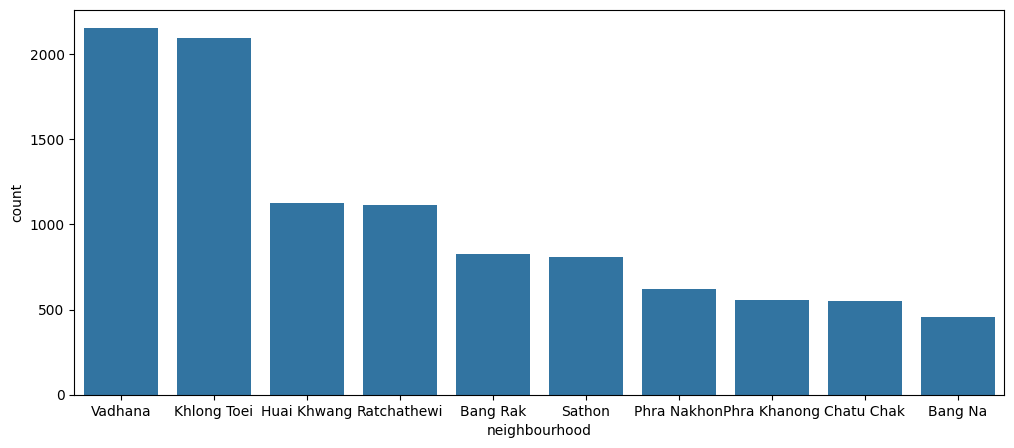

In [47]:
# visualisasi 10 lingkungan dengan jumlah tempat penginapan terbanyak
dfc_n = pd.DataFrame(dfc['neighbourhood'].value_counts().head(10))

plt.figure(figsize=(12,5))
sns.barplot(dfc_n, y = 'count', x = 'neighbourhood')

Di Bangkok tempat penginapan terbanyak berada pada lingkungan **Vadhana** dan **Khlong Toei** .

### Statistik Inferensial

Pada bagian _Data Understanding_, kita telah memperolah informasi bahwa tempat penginapan di Bangkok ini memiliki 4 tipe kamar yaitu 'Entire home/apt', 'Private room', 'Hotel room', dan 'Shared room'. 

Oleh karena itu, dengan statistika inferensial selanjutnya kita akan membuat hipotesis untuk menguji apakah kategori tipe kamar berpengaruh terhadap jumlah review yang diperoleh.

Hipotesis yang kita pakai adalah :

H0 (kondisi nol) : Tidak ada perbedaan jumlah review yang diperoleh untuk ke-4 tipe kamar. 

H1 (kondisi satu) : Ada perbedaan jumlah review yang diperoleh untuk ke-4 tipe kamar, ada salah satu yang signifikan. 

In [48]:
dfc.groupby(['neighbourhood','room_type']).agg({'number_of_reviews':'sum'})

number_of_reviews
neighbourhood   room_type                         
Bang Bon        Entire home/apt                  1
                Private room                     0
Bang Kapi       Entire home/apt               1460
                Hotel room                       4
                Private room                   350
...                                            ...
Wang Thong Lang Shared room                      0
Yan na wa       Entire home/apt               1429
                Hotel room                     138
                Private room                  1380
                Shared room                      0

[168 rows x 1 columns]

Kita perlu memeriksa terlebih dahulu distribusi data kolom 'number_of_reviews'.

In [49]:
# cek distribusi kolom 'number_of_reviews' dengan beberapa cara :

#1 Kolmogorov Smirnov

stat, pvalue = kstest(dfc['number_of_reviews'], 'norm')

if pvalue < 0.05:
  print('Berdasarkan Kolmogorov Smirnov : tidak cukup bukti untuk menunjukkan bahwa data itu normal -> TIDAK NORMAL')
else:
  print('data normal')

#2 Lilliefors

stat, pvalue = lilliefors(dfc['number_of_reviews'])

if pvalue < 0.05:
  print('Berdasarkan Lilliefors : tidak cukup bukti untuk menunjukkan bahwa data itu normal -> TIDAK NORMAL')
else:
  print('data normal')

#3 D' Agustino Pearson

stat, pvalue = normaltest(dfc['number_of_reviews'])

if pvalue < 0.05:
  print("Berdasarkan D' Agustino Pearson : tidak cukup bukti untuk menunjukkan bahwa data itu normal -> TIDAK NORMAL")
else:
  print('data normal')

Berdasarkan Kolmogorov Smirnov : tidak cukup bukti untuk menunjukkan bahwa data itu normal -> TIDAK NORMAL
Berdasarkan Lilliefors : tidak cukup bukti untuk menunjukkan bahwa data itu normal -> TIDAK NORMAL
Berdasarkan D' Agustino Pearson : tidak cukup bukti untuk menunjukkan bahwa data itu normal -> TIDAK NORMAL


Karena distribusi data kita tidak normal dan kita membandingkan dari 4 kelompok sehingga kita menggunakan Statistika Inferensial Kruskal Walis.

In [50]:
entire_home = dfc[dfc['room_type'] == 'Entire home/apt']['number_of_reviews']
private = dfc[dfc['room_type'] == 'Private room']['number_of_reviews']
hotel = dfc[dfc['room_type'] == 'Hotel room']['number_of_reviews']
shared = dfc[dfc['room_type'] == 'Shared room']['number_of_reviews']

fscore, pval = kruskal(entire_home, private, hotel, shared)

if pval > 0.05:
    print("H0 Diterima")
    print('Tidak ada perbedaan review untuk ke-4 tipe kamar.')
else:
    print('H0 Ditolak')
    print('Ada perbedaan review untuk ke-4 tipe kamar. Paling tidak ada salah satu tipe yang berbeda signifikan')

H0 Ditolak
Ada perbedaan review untuk ke-4 tipe kamar. Paling tidak ada salah satu tipe yang berbeda signifikan


Ternyata, memang ada perbedaan antara tiap tipe kamar terhadap jumlah review yang diperoleh. **Ada salah satu tipe kamar yang berpengaruh signifikan**.

### Variabel kategorik

In [51]:
kategorikc = dfc.select_dtypes(include = 'object')

kategorikc.describe()

,name,host_name,neighbourhood,room_type,last_review
count,15854,15854,15854,15854,15854
unique,14795,5313,50,4,1670
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,0
freq,45,228,2153,8912,5790


In [52]:
# melihat jumlah penginapan berdasarkan tipe kamarnya

display(dfc.groupby(['room_type']).agg({'name':'count'}).sort_values('name', ascending=False))
dfc.shape

,name
room_type,
Entire home/apt,8912
Private room,5770
Hotel room,649
Shared room,523


(15854, 16)

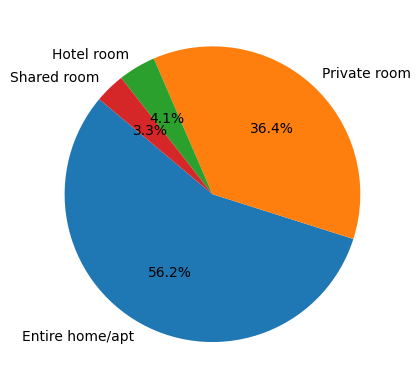

In [53]:
# visualisasi banyaknya tipe kamar

dfc_rt = dfc['room_type'].value_counts()
plt.pie(dfc_rt, labels = dfc_rt.index, autopct='%1.1f%%', startangle=140)

plt.show()

Terlihat bahwa dari 15854 penginapan di Bangkok yang ada dalam list Airbnb ini tipe kamar Entire room/apt memang paling banyak tersedia (56,21%).

<Axes: xlabel='number_of_reviews', ylabel='room_type'>

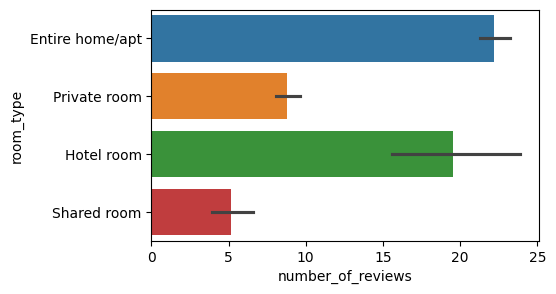

In [54]:
# visualisasi yang menunjukkan tipe kamar terhadap jumlah review

plt.figure(figsize=(5,3))
sns.barplot(dfc, y = 'room_type', x = 'number_of_reviews', hue='room_type')

In [55]:
dfc.groupby(['room_type']).agg({'name':'count','number_of_reviews':'sum', 'minimum_nights':'mean'}).sort_values('number_of_reviews', ascending=False)

,name,number_of_reviews,minimum_nights
room_type,,,
Entire home/apt,8912,197943,20.514138
Private room,5770,50710,9.791508
Hotel room,649,12700,1.842835
Shared room,523,2682,3.690249


Hal ini cukup menarik karena dari hasil analisa kita mendapatkan informasi bahwa jumlah review tertinggi diperoleh dari _room_type_ dengan tipe **Entire home/apt** padahal minimum_nights-nya (minimal lama inap)-nya paling lama dibandingkan _room_type_ lainnya. 

Dari faktor 'minumum_nights' berarti untuk sewa _Entire home/apt_ dibutuhkan minimal pemesanan contoh selama 20 malam, sedangkan untuk _Hotel room_ atau _Shared room_ bisa hanya memesan untuk minimum 1 malam. Harusnya selama masa sewa _Entire home/apt_ 20 malam tersebut, tipe _Hotel room_ atau _Shared room_ bisa memperoleh 20 jumlah review. Namun dalam data kita ditunjukkan diperoleh bahwa jumlah review tertinggi justru diperoleh dari tipe kamar yang membutuhkan minimum masa sewa paling lama.

Kita memperolah hasil analisa bahwa tipe 'entire home/apt' memiliki jumlah review paling tinggi. Kita coba breakdown di lingkungan mana saja yang memang tipe kamar ini tersedia paling banyak dan juga dipesan paling sering (favorit).

In [56]:
# menggabungkan jumlah tempat penginapan (name) dan banyak review yang diperoleh 1 tahun terakhir (number_of_reviews_ltm) yang ada di setiap lingkungan (neighbourhood) berdasarkan tipe kamar (room_type)

dfc_1 = dfc.groupby([('neighbourhood'),'room_type']).agg({'name':'count', 'number_of_reviews':'sum', 'minimum_nights':'mean'}).sort_values('number_of_reviews', ascending=False).reset_index()
dfc_1


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
0,Khlong Toei,Entire home/apt,1520,34377,16.326316
1,Vadhana,Entire home/apt,1451,32536,17.774638
2,Sathon,Entire home/apt,557,19566,16.353680
3,Huai Khwang,Entire home/apt,776,14012,19.364691
4,Ratchathewi,Entire home/apt,656,13998,19.202744
...,...,...,...,...,...
163,Lat Phrao,Shared room,2,0,3.000000
164,Min Buri,Shared room,1,0,1.000000
165,Nong Khaem,Entire home/apt,2,0,1.000000
166,Phasi Charoen,Hotel room,1,0,1.000000


Kita coba breakdown untuk melihat tipe kamar apa yang paling banyak di beberapa lingkungan yaitu lingkungan dengan harga penginapan termurah dan termahal.

In [57]:
# kita coba breakdown 5 lingkungan termurah

price_min = dfc.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price', ascending=True).reset_index().head(5)
display(price_min)

display(dfc_1[dfc_1['neighbourhood']== price_min['neighbourhood'][0]])
display(dfc_1[dfc_1['neighbourhood']== price_min['neighbourhood'][1]])
display(dfc_1[dfc_1['neighbourhood']== price_min['neighbourhood'][2]])
display(dfc_1[dfc_1['neighbourhood']== price_min['neighbourhood'][3]])
display(dfc_1[dfc_1['neighbourhood']== price_min['neighbourhood'][4]])

,neighbourhood,price
0,Lak Si,1143.833333
1,Nong Khaem,1205.222222
2,Don Mueang,1273.910180
3,Lat Krabang,1358.523490
4,Phasi Charoen,1370.219355


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
45,Lak Si,Private room,81,962,6.037037
48,Lak Si,Entire home/apt,40,789,12.400000
136,Lak Si,Hotel room,5,4,1.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
148,Nong Khaem,Private room,7,1,1.142857
165,Nong Khaem,Entire home/apt,2,0,1.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
30,Don Mueang,Private room,114,1898,4.710526
61,Don Mueang,Entire home/apt,36,535,23.722222
97,Don Mueang,Hotel room,10,86,1.000000
110,Don Mueang,Shared room,7,36,1.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
38,Lat Krabang,Private room,80,1275,4.050000
50,Lat Krabang,Entire home/apt,39,728,14.282051
51,Lat Krabang,Hotel room,14,640,9.000000
105,Lat Krabang,Shared room,16,46,1.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
40,Phasi Charoen,Entire home/apt,91,1148,14.890110
73,Phasi Charoen,Private room,62,286,9.741935
160,Phasi Charoen,Shared room,1,0,1.000000
166,Phasi Charoen,Hotel room,1,0,1.000000


Lingkungan dengan harga yang termurah menyediakan penginapan dengan tipe kamar 'private room' dan 'entire home/apt'.

In [58]:
# kita coba breakdown 5 lingkungan termahal

price_max = dfc.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index().head(5)
display(price_max)

display(dfc_1[dfc_1['neighbourhood']== price_max['neighbourhood'][0]])
display(dfc_1[dfc_1['neighbourhood']== price_max['neighbourhood'][1]])
display(dfc_1[dfc_1['neighbourhood']== price_max['neighbourhood'][2]])
display(dfc_1[dfc_1['neighbourhood']== price_max['neighbourhood'][3]])
display(dfc_1[dfc_1['neighbourhood']== price_max['neighbourhood'][4]])

,neighbourhood,price
0,Bang Phlat,6257.488479
1,Huai Khwang,5036.084444
2,Khlong San,4772.330532
3,Vadhana,4452.131444
4,Parthum Wan,4355.628571


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
57,Bang Phlat,Entire home/apt,132,580,33.795455
79,Bang Phlat,Private room,76,225,4.276316
94,Bang Phlat,Shared room,6,93,1.833333
151,Bang Phlat,Hotel room,3,1,20.666667


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
3,Huai Khwang,Entire home/apt,776,14012,19.364691
16,Huai Khwang,Private room,301,3940,10.302326
81,Huai Khwang,Hotel room,25,188,1.640000
133,Huai Khwang,Shared room,23,5,1.260870


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
13,Khlong San,Entire home/apt,186,4545,33.059140
23,Khlong San,Private room,134,2528,16.529851
86,Khlong San,Hotel room,26,152,1.038462
109,Khlong San,Shared room,11,38,34.363636


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
1,Vadhana,Entire home/apt,1451,32536,17.774638
18,Vadhana,Private room,544,3381,13.419118
43,Vadhana,Hotel room,105,1042,2.047619
65,Vadhana,Shared room,53,456,1.207547


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
7,Parthum Wan,Entire home/apt,255,7664,31.462745
44,Parthum Wan,Private room,140,964,10.428571
66,Parthum Wan,Hotel room,45,450,1.000000
116,Parthum Wan,Shared room,15,25,1.333333


Ternyata ke-5 lingkungan dengan harga tertinggi ini memiliki tempat penginapan dengan tipe kamar 'Entire home/apt' terbanyak. 

Selanjutnya, kita coba breakdown untuk melihat tipe kamar apa yang paling banyak di lingkungan yang memiliki jumlah review terendah (paling kurang favorit) dan jumlah review tertinggi (paling favorit).

In [59]:
# melihat 5 lingkungan dengan jumlah review terendah (paling kurang favorit)

fav_min = dfc.groupby('neighbourhood').agg({'number_of_reviews':'sum'}).sort_values('number_of_reviews', ascending=True).reset_index().head(5)
display(fav_min)

display(dfc_1[dfc_1['neighbourhood']== fav_min['neighbourhood'][0]])
display(dfc_1[dfc_1['neighbourhood']== fav_min['neighbourhood'][1]])
display(dfc_1[dfc_1['neighbourhood']== fav_min['neighbourhood'][2]])
display(dfc_1[dfc_1['neighbourhood']== fav_min['neighbourhood'][3]])
display(dfc_1[dfc_1['neighbourhood']== fav_min['neighbourhood'][4]])

,neighbourhood,number_of_reviews
0,Bang Bon,1
1,Nong Khaem,1
2,Nong Chok,4
3,Thawi Watthana,11
4,Thung khru,22


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
146,Bang Bon,Entire home/apt,2,1,7.5
162,Bang Bon,Private room,3,0,1.0


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
148,Nong Khaem,Private room,7,1,1.142857
165,Nong Khaem,Entire home/apt,2,0,1.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
139,Nong Chok,Entire home/apt,8,3,1.375
149,Nong Chok,Private room,6,1,1.000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
129,Thawi Watthana,Private room,7,7,2.142857
134,Thawi Watthana,Entire home/apt,5,4,7.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
122,Thung khru,Private room,14,15,1.357143
128,Thung khru,Entire home/apt,9,7,41.888889


Sama seperti lingkungan dengan harga termurah sebelumnya, lingkungan yang kurang favorit ini menyediakan penginapan dengan tipe kamar 'entire home/apt' dan 'private room'.

In [60]:
# breakdown 5 lingkungan ter-favorit

fav_max = dfc.groupby('neighbourhood').agg({'number_of_reviews':'sum'}).sort_values('number_of_reviews', ascending=False).reset_index().head(5)
display(fav_max)

display(dfc_1[dfc_1['neighbourhood']== fav_max['neighbourhood'][0]])
display(dfc_1[dfc_1['neighbourhood']== fav_max['neighbourhood'][1]])
display(dfc_1[dfc_1['neighbourhood']== fav_max['neighbourhood'][2]])
display(dfc_1[dfc_1['neighbourhood']== fav_max['neighbourhood'][3]])
display(dfc_1[dfc_1['neighbourhood']== fav_max['neighbourhood'][4]])

,neighbourhood,number_of_reviews
0,Khlong Toei,41281
1,Vadhana,37415
2,Sathon,22242
3,Ratchathewi,20698
4,Huai Khwang,18145


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
0,Khlong Toei,Entire home/apt,1520,34377,16.326316
14,Khlong Toei,Hotel room,73,4249,1.383562
22,Khlong Toei,Private room,489,2629,9.466258
115,Khlong Toei,Shared room,15,26,1.400000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
1,Vadhana,Entire home/apt,1451,32536,17.774638
18,Vadhana,Private room,544,3381,13.419118
43,Vadhana,Hotel room,105,1042,2.047619
65,Vadhana,Shared room,53,456,1.207547


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
2,Sathon,Entire home/apt,557,19566,16.353680
27,Sathon,Private room,220,2173,7.245455
69,Sathon,Hotel room,15,329,3.200000
83,Sathon,Shared room,17,174,1.588235


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
4,Ratchathewi,Entire home/apt,656,13998,19.202744
15,Ratchathewi,Private room,327,3996,6.577982
28,Ratchathewi,Hotel room,70,2168,1.414286
60,Ratchathewi,Shared room,61,536,1.000000


,neighbourhood,room_type,name,number_of_reviews,minimum_nights
3,Huai Khwang,Entire home/apt,776,14012,19.364691
16,Huai Khwang,Private room,301,3940,10.302326
81,Huai Khwang,Hotel room,25,188,1.640000
133,Huai Khwang,Shared room,23,5,1.260870


Dari analisa informasi diatas, ternyata ada kecenderungan customer Airbnb ini memang lebih membutuhkan atau mencari penginapan dengan tipe _Entire home/apt_ di Bangkok (ditunjukkan dengan banyak review yang diberikan untuk tempat dengan tipe Entire home/apt yang tinggi) dan juga fakta lapangannya tempat penginapan yang tersedia di Airbnb Bangkok ini lebih banyak dengan tipe _Entire home/apt_ sehingga berarti pemilik properti di Bangkok menyadari bahwa kebanyakan orang memang membutuhkan tipe kamar ini sehingga menyediakan tipe Entire room yang lebih banyak.

In [61]:
# melihat 5 lingkungan dengan harga tertinggi (price), jumlah tempat penginapan yang tersedia (count dari name), dan jumlah review (number_of_reviews)

display(dfc.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index().head(5))

display(dfc.groupby('neighbourhood').agg({'name':'count', 'number_of_reviews':'sum'}).sort_values('number_of_reviews', ascending=False).reset_index().head(5))


,neighbourhood,price
0,Bang Phlat,6257.488479
1,Huai Khwang,5036.084444
2,Khlong San,4772.330532
3,Vadhana,4452.131444
4,Parthum Wan,4355.628571


,neighbourhood,name,number_of_reviews
0,Khlong Toei,2097,41281
1,Vadhana,2153,37415
2,Sathon,809,22242
3,Ratchathewi,1114,20698
4,Huai Khwang,1125,18145


Secara harga, lingkungan Vadhana dan Khlong Toei bukan merupakan lingkungan paling elite/termahal namun lingkungan ini menyediakan tempat penginapan paling banyak.

Ternyata lingkungan Khlong Toei memiliki jumlah review terbanyak (41.281) walaupun tempat penginapan yang tersedia di lingkungan ini merupakan urutan kedua (setelah Vardhana). Dan dari segi harga, Khlong Toei tidak termasuk dalam top 5 lingkungan termahal. Lingkungan ini ternyata cukup menarik untuk dikunjungi. Lingkungan ini memang menyediakan banyak tempat menarik untuk dikunjungi seperti Grand Palace, Wat Arun, Sea Life Bangkok Ocean World, dan lainnya https://www.trip.com/travel-guide/attraction/khlong-toei-2016435/tourist-attractions/?locale=en-XX&curr=USD.

Untuk lingkungan terfavorit kedua yaitu Vadhana atau dikenal juga Watthana adalah ternyata salah satu kawasan komersial di Bangkok dengan banyak kondominium. Ekspatriat dari berbagai negara tinggal di lingkungan ini. Sangat wajar jika memang lingkungan ini menyediakan penginapan dengan tipe 'Entire home/apt' paling banyak (2.153).

### Variabel numerik

In [62]:
dfc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [63]:
numerikc = dfc.select_dtypes(include = 'number')
numerikc.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

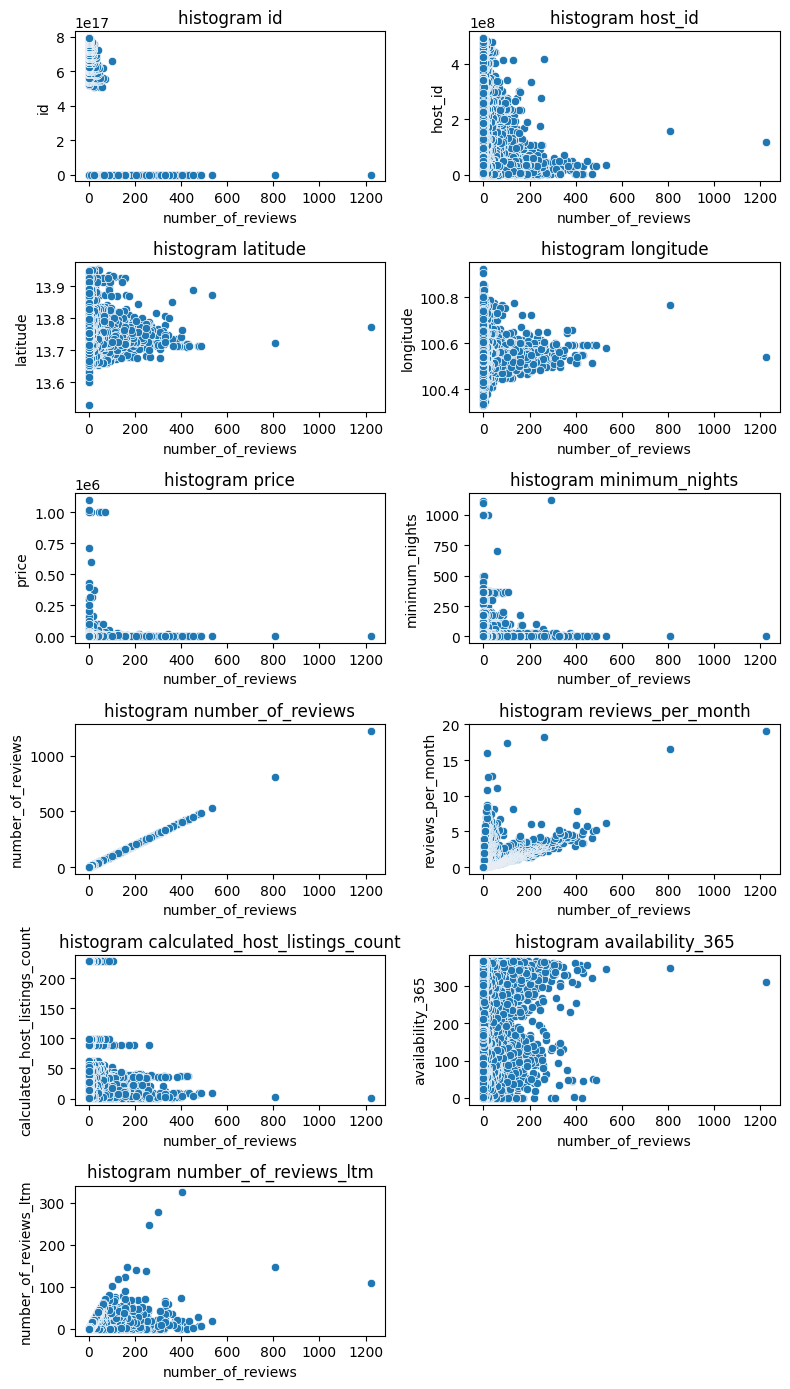

In [64]:
fig = plt.figure(figsize=(8,14)) # horizontal, vertikal

count = 0
for kolom in numerikc.columns:
    count += 1
    plt.subplot(6,2,count)
    sns.scatterplot(x = numerikc['number_of_reviews'], y = numerikc[kolom])
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

Informasi yang dapat kita lihat dari gambar diatas adalah hubungan antara kolom `number_of_reviews` dengan kolom lainnya. 

Kolom `number_of_reviews` menunjukkan hubungannya agak ada berbanding lurus dengan kolom `review_per_months` `number_of_reviews_ltm` walaupun banyak anomalinya juga. Hal tersebut wajar karena saling berkaitan mengenai 'review'.


Dari segi `price` ternyata persebarannya beragam juga, tempat penginapan yang harganya murah memiliki jumlah reviewnya menyebar dari sedikit hingga banyak. Dan tempat dengan harga mahal ternyata jumlah reviewnya cenderung sedikit juga.

Hubungan `number_of_reviews` terhadap variabel numerik lainnya terlihat bervariasi. 

In [65]:
# Ingin mengetahui dimana data dengan harga tertinggi

dfc.loc[dfc['price']==dfc.describe()['price']['max']]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,0,0.0,1,365,0


In [66]:
# Ingin mengetahui dimana data dengan ratings tertinggi per bulannya

dfc.loc[dfc['reviews_per_month']==dfc.describe()['reviews_per_month']['max']]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16 00:00:00,19.13,1,310,109


In [67]:
# Ingin mengetahui dimana data dengan jumlah review tertinggi 12 bulan terakhir dan jumlah review keseluruhan

display(dfc.loc[dfc['number_of_reviews_ltm'] == dfc.describe()['number_of_reviews_ltm']['max']])
display(dfc.loc[dfc['number_of_reviews'] == dfc.describe()['number_of_reviews']['max']])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5759,28684287,New* King size bed room - 5-min to BTS,33098670,Paw,Ratchathewi,13.76222,100.54041,Entire home/apt,1140,1,406,2022-12-26 00:00:00,7.83,4,343,325


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16 00:00:00,19.13,1,310,109


In [68]:
# Ingin mengetahui owner/host dengan tempat penginapan terbanyak

dfc.loc[dfc['calculated_host_listings_count']==dfc.describe()['calculated_host_listings_count']['max']]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6473,31029786,Near The Grand Palace/ASOK Station/Sukhumvit#05,201677068,Curry,Khlong Toei,13.735100,100.559190,Entire home/apt,2057,1,60,2022-12-11 00:00:00,1.24,228,361,18
6479,30804041,Near The Grand Palace/ASOK Station/Sukhumvit 5...,201677068,Curry,Khlong Toei,13.733850,100.557140,Entire home/apt,2057,1,76,2022-12-14 00:00:00,1.55,228,361,19
6672,31607546,Near The Grand Palace/ASOK Station/Sukhumvit#06,201677068,Curry,Khlong Toei,13.733950,100.558800,Entire home/apt,2057,1,101,2022-12-14 00:00:00,2.10,228,361,20
7009,32504596,New! Sukhumvit NANA 1BR Suit near BTS 2PPL,201677068,Curry,Ratchathewi,13.750870,100.555970,Entire home/apt,1466,3,86,2022-11-08 00:00:00,1.87,228,356,14
7244,32970026,30days! Sukhumvit NANA spacious 1BR 2PPL near...,201677068,Curry,Ratchathewi,13.749710,100.556570,Entire home/apt,1466,3,81,2022-11-04 00:00:00,1.78,228,358,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,750412362717761633,New!Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.735637,100.557799,Entire home/apt,3429,1,3,2022-12-25 00:00:00,3.00,228,360,3
15336,771365335830828138,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.750300,100.555503,Entire home/apt,3994,3,0,0,0.00,228,340,0
15474,780130696121233047,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池...,201677068,Curry,Khlong Toei,13.718087,100.580706,Entire home/apt,1588,30,0,0,0.00,228,304,0
15515,777296851892558815,One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK...,201677068,Curry,Ratchathewi,13.756598,100.540777,Entire home/apt,2000,25,0,0,0.00,228,348,0


In [69]:
host_max = dfc.loc[dfc['calculated_host_listings_count']==dfc.describe()['calculated_host_listings_count']['max']]
host_max['room_type'].unique()

array(['Entire home/apt'], dtype=object)

Dari analisa diatas ternyata tempat penginapan dengan harga paling tinggi, reviews paling tinggi, jumlah review tertinggi semuanya memiliki type Entire home/apt. Bahkan seorang pemilik penginapan, Mr/Mrs Curry, yang memiliki banyak sekali properti disewakan di Airbnb Bangkok ini ternyata 228 properti yang beliau sewakan dengan tipe Entire home/apt.

Hal ini menunjukkan bahwa memang customer lebih mencari/membutuhkan penginapan dengan tipe kamar 'Entire room/apt'.

In [70]:
# Ingin melihat yang availability_365 berada di batas bawah --> menggambarkan sudah banyak dibooking untuk 1 tahun ke depan

display(dfc.loc[dfc['availability_365']==dfc.describe()['availability_365']['25%']])
dfc.loc[dfc['availability_365']==dfc.describe()['availability_365']['25%']].shape

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
725,6312629,"Home in Bangkok -Sukhumvit, BKK",20267951,Noom,Phra Khanong,13.690420,100.610120,Entire home/apt,850,3,120,2022-12-26 00:00:00,1.37,1,138,10
2110,13234274,Floral classic room in Baannai colonial house,29897708,Doungsawart,Phaya Thai,13.778480,100.531420,Private room,2250,1,7,2022-12-21 00:00:00,0.09,4,138,5
2312,14156191,In the heart of BKK,85557906,Terachai,Vadhana,13.739040,100.560380,Private room,1703,1,96,2022-11-24 00:00:00,1.32,7,138,1
3355,18528111,2B-2BEDROOMS/3BATHS BKK DOWNTOWN @ ASOKE BTS/MRT,30262097,Dr. Supot,Vadhana,13.746800,100.558890,Entire home/apt,5117,2,127,2022-12-16 00:00:00,1.85,15,138,20
3841,20273305,"Easy cosy room, 2-3 person, near BTS, DMK airport",21970931,Nui,Chatu Chak,13.841020,100.588840,Entire home/apt,643,1,80,2022-12-08 00:00:00,1.28,22,138,16
4335,22284434,A simple room near bus to the city and Don Mueang,95634188,Kittipob,Bang Khen,13.862130,100.613560,Private room,790,2,3,2022-10-17 00:00:00,0.09,1,138,2
5979,29379952,New Pool View Condo by MRT HuayKwang,184339795,Atikun,Din Daeng,13.784080,100.572710,Entire home/apt,800,18,19,2022-12-15 00:00:00,0.38,4,138,7
6203,30021305,"FITNESS,WIFI,Pool Geart Apartment near BTS! -m...",128943709,Rain,Khlong Toei,13.703820,100.593770,Entire home/apt,1500,7,8,2022-10-20 00:00:00,0.16,26,138,1
7526,33751932,Luxury condo@Superb skyline view,199624792,Ho,Vadhana,13.739720,100.590270,Entire home/apt,1600,30,2,2019-08-08 00:00:00,0.05,23,138,0
7921,35099329,Near Ekkamai BTS/WIFI/One Bedroom/Swimming pool,145673155,Cora,Khlong Toei,13.713820,100.580860,Entire home/apt,995,3,3,2022-08-07 00:00:00,0.25,26,138,3


(23, 16)

Data di atas adalah tempat penginapan dengan availability_365 = 138 (berada di batas bawah/Q1). Tempat-tempat ini adalah bisa diasumsikan merupakan paling banyak di-booking karena jumlah availability-nya untuk 1 tahun ke depan tersisa dibatas bawah yaitu sisa 138 hari lagi. Dari data tersebut terlihat bahwa yang favorit tetap dengan tipe 'Entire room/apt' sebanyak 20 tempat (87%), selanjutnya diikuti ada 3 tempat (17%) bertipe 'private room'.

Dari analisa ini pun kita menemukan bahwa memang customer sangat cenderung mencari tempat yang lebih memberikan privasi sehingga banyak memesan tempat penginapan bertipe Entire room/apt, lalu setelahnya tipe 'private room'.

Tipe customer yang biasanya memesan tempat penginapan di Airbnb Bangkok ini sebagian besar adalah :
1. Turis Internasional. Menurut _Elite Plus Magazine_, Bangkok adalah salah satu pasar Airbnb tersebar di dunia. Daya tarik Bangkok / negara Thailand ini sangat kuat di kancah internasional, dengan wisatawan dunia yang menunjukkan ketertarikan untuk berkunjung agar dapat merasakan _hospitality_, budaya, makanan, dan tradisi negara Thailand.
2. Ekspatriat. Bangkok memiliki banyak distrik komersial sehingga banyak warga negara asing yang tinggal di Bangkok untuk keperluan bisnis. Ini juga dapat membuat pemesanan penginapan tipe Entire room menjadi lebih dominan.

### _Actionable Recommendation_

> ### Peningkatan Revenue

Kita pahami bahwa setiap 1 number_of_reviews pasti diperoleh dari 1 transaksi yang berhasil. Sehingga semakin banyak jumlah review akan memberi dampak positif baik bagi owner maupun customer. Bagi owner, review yang diberikan akan menjadi masukan membangun mana yang perlu ditingkatkan dan dipertahankan. Bagi customer, banyaknya review yang ada memberikan gambaran yang jelas dari pengalaman customer sebelumnya dan meningkatkan kepercayaan dalam memesan tempat tersebut juga juga.

Dari segi bisnis, goals yang ingin kita capai adalah harus meningkatkan jumlah review, karena review yang banyak berbanding lurus dengan banyaknya jumlah transaksi berhasil. 

Semakin banyak review berarti semakin banyak transaksi yang berhasil. Jumlah transaksi semakin tinggi, berarti terjadi peningkatan pendapatan/revenue. 

Khususnya untuk selain tipe kamar 'Entire home/apt' kita harus melakukan sesuatu yang mampu meningkatkan jumlah review. Karena masa sewanya yang cukup singkat, bisa saja customer cenderung enggan/malas untuk mengisi review.
Adapun cara untuk meningkatkan jumlah review yaitu melakukan promosi seperti:
* Memberikan potongan harga/diskon yang berlaku untuk 1 tahun ke depan kepada ex-customer kita, dengan syarat langsung memberikan review di platform Airbnb (batas 48 jam setelah check-out), dalam bentuk e-voucher yang akan dikirimkan ke email customer langsung.
* Apabila review diberikan sesuai ketentuan platform Airbnb yaitu 14 hari sejak checkout, tetap akan mendapatkan e-voucher namun hanya berlaku 4 bulan ke depan ---> ini bertujuan agar customer sesegara mungkin memberikan review karena ada kecenderungan bisa lupa apabila menunda memberikan reviews.

In [71]:
# ingin melihat lingkungan dengan setiap tipe kamar yang ada

dfc_1.groupby(['neighbourhood','room_type']).sum().head(27)

name  number_of_reviews  minimum_nights
neighbourhood   room_type                                               
Bang Bon        Entire home/apt     2                  1        7.500000
                Private room        3                  0        1.000000
Bang Kapi       Entire home/apt   124               1460       20.040323
                Hotel room          1                  4       28.000000
                Private room      132                350        9.083333
                Shared room         3                  2        4.000000
Bang Khae       Entire home/apt    35                115        8.171429
                Hotel room          1                  1        1.000000
                Private room       56                 43        8.196429
Bang Khen       Entire home/apt    48                555       22.145833
                Hotel room          3                  9        1.000000
                Private room       64                170        2.390625
                Shared room         1                  0        1.000000
Bang Kho laen   Entire home/apt    93               2223       48.731183
                Hotel room          2                  7        1.000000
                Private room       45                388       16.933333
Bang Khun thain Entire home/apt     7                 97       61.428571
                Private room       12                  5        3.916667
                Shared room         2                  0        2.500000
Bang Na         Entire home/apt   278               4630       36.942446
                Hotel room          9                 16        1.888889
                Private room      168                923       20.875000
                Shared room         3                  1        1.000000
Bang Phlat      Entire home/apt   132                580       33.795455
                Hotel room          3                  1       20.666667
                Private room       76                225        4.276316
                Shared room         6                 93        1.833333

In [72]:
dfc.groupby('neighbourhood').agg({'name':'count','number_of_reviews':'sum'}).sort_values('number_of_reviews', ascending=False).head(10)

,name,number_of_reviews
neighbourhood,,
Khlong Toei,2097,41281
Vadhana,2153,37415
Sathon,809,22242
Ratchathewi,1114,20698
Huai Khwang,1125,18145
Bang Rak,827,17654
Phaya Thai,422,13659
Parthum Wan,455,9103
Chatu Chak,548,8218


Dalam kondisi diatas, terlihat lingkungan Vadhana memiliki tempat penginapan yang lebih banyak namun mendapatkan jumlah review yang lebih sedikit daripada Khlong Tei. Khlong Tei dengan harga yang bukan termasuk 5 termahal namun memiliki jumlah review yang banyak. Customer yang sudah menginap di lingkungan Khlong Tei ini cenderung rajin memberikan reviewnya.

Dengan gerakan promo yang kita sarankan diatas, harapannya di semua lingkungan akan mengalami peningkatan jumlah review.

In [73]:
dfc

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Kita asumsikan bahwa 1 jumlah review = 1 transaksi berhasil sehingga revenue dapat kita hitung dengan mengalikan banyaknya transaksi dikali harga setiap penginapannya.

In [74]:
# menambahkan kolom 'revenue'

dfc['revenue'] = (dfc['price'] * dfc['number_of_reviews'])
dfc

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revenue
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0,123825
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1,2572
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0,0


In [75]:
# melihat rata-rata revenue sebelum adanya gerakan e-voucher

dfc.describe()['revenue']['mean']

49158.72341364955

In [76]:
# Kita copy datanya dulu

dfc_rev = dfc.copy()

In [77]:
# melihat semua tempat yang jumlah reviewnya masih 0

dfc_rev[dfc_rev['number_of_reviews']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revenue
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.0,2,358,0,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.0,1,365,0,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.0,3,365,0,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0,0.0,1,365,0,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0,0.0,1,365,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.0,1,362,0,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.0,14,365,0,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.0,14,365,0,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.0,14,365,0,0


Selanjutnya, yang kita lakukan adalah dengan asumsi bahwa gerakan promo kita **berhasil** sehingga outputnya akan ada peningkatan jumlah review **minimal 1** :

1. Kita kan tambahkan 1 nilai pada kolom `number_of_reviews`. Dengan asumsi apabila gerakan kita berhasil se-minimalnya jumlah review akan bertambah 1 untuk setiap barisnya. Yang awalnya 0 akan menjadi 1, dan yang awalnya tidak 0 (sudah ada review) akan bertambah 1 juga.

2. Perlu menjadi catatan, semua baris yang kita tambahkan 1 pada jumlah reviewnya adalah semua tempat penginapan yang kolom 'availability_365' tidak nol (0). Karena jika kolom availabiliy_365 adalah 0 berarti tempat tersebut sedang tidak bisa di-booking untuk 1 tahun ke depan. Jadi asumsi tidak akan ada peningkatan jumlah review juga.

In [78]:
# kita tambah 1 semua 'number_of_reviews' yang 'availability_365' tidak nol

dfc_rev['number_of_reviews'] = dfc_rev['number_of_reviews'].loc[dfc_rev['availability_365']!=0] + 1
dfc_rev

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revenue
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,66.0,2020-01-06 00:00:00,0.50,2,353,0,123825
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,1.0,0,0.00,2,358,0,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,1.0,0,0.00,1,365,0,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,3.0,2022-04-01 00:00:00,0.03,1,323,1,2572
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,1.0,0,0.00,3,365,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,1.0,0,0.00,1,362,0,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,1.0,0,0.00,14,365,0,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,1.0,0,0.00,14,365,0,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,1.0,0,0.00,14,365,0,0


In [79]:
dfc_rev['revenue_up'] = (dfc_rev['price'] * dfc_rev['number_of_reviews'])
dfc_rev

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revenue,revenue_up
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,66.0,2020-01-06 00:00:00,0.50,2,353,0,123825,125730.0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,1.0,0,0.00,2,358,0,0,1316.0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,1.0,0,0.00,1,365,0,0,800.0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,3.0,2022-04-01 00:00:00,0.03,1,323,1,2572,3858.0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,1.0,0,0.00,3,365,0,0,1905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,1.0,0,0.00,1,362,0,0,2298.0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,1.0,0,0.00,14,365,0,0,1429.0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,1.0,0,0.00,14,365,0,0,1214.0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,1.0,0,0.00,14,365,0,0,1214.0


In [80]:
# melihat rata-rata revenue setelah adanya e-voucher dorongan pengisian review

dfc_rev['revenue_up'].mean()

53554.61732346469

In [81]:
persen_revenue = (dfc_rev['revenue_up'].mean() - dfc_rev['revenue'].mean())/(dfc_rev['revenue'].mean())*100

print(f'Dengan gerakan/campaign/promosi yang kita lakukan terjadi peningkatan minimal {persen_revenue} %.')

Dengan gerakan/campaign/promosi yang kita lakukan terjadi peningkatan minimal 8.942245861076534 %.


Terjadi peningkatan revenue minimal sebesar 8,94 % dengan e-voucher yang mendorong agar customer se-segera mungkin mengisi review setelah checkout.

##### Peningkatan Jumlah Review per tahun

In [88]:
dfc.shape

(15854, 17)

In [89]:
# mengambil data yang kolol last_review tidak nol

dfc_date = dfc[dfc_rev['last_review']!='0']
dfc_date.shape

(10064, 17)

Seperti kita ketahui pada data cleaning bahwa kolom 'last_review' memiliki banyak data kosong, kita kan coba menganalisa perkembangan pertambahan jumlah review dari tahun ke tahun menggunakan data yang tanggal reviewnya bukan nol.

In [90]:
dfc_date['last_review'] = pd.to_datetime(dfc_date['last_review'])
dfc_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10064 entries, 0 to 15796
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10064 non-null  int64         
 1   name                            10064 non-null  object        
 2   host_id                         10064 non-null  int64         
 3   host_name                       10064 non-null  object        
 4   neighbourhood                   10064 non-null  object        
 5   latitude                        10064 non-null  float64       
 6   longitude                       10064 non-null  float64       
 7   room_type                       10064 non-null  object        
 8   price                           10064 non-null  int64         
 9   minimum_nights                  10064 non-null  int64         
 10  number_of_reviews               10064 non-null  int64         
 11  last_re

In [91]:
dfc_date.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revenue
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,123825
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2572
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,19000
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,1558
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,15580


In [92]:
# hanya mengambil last_review max (paling terbaru) berdasarkan ID tempat penginapan, tetapi tanpa mengubah urutan index

dfc_date['year_last_review'] = dfc_date.groupby('id')['last_review'].transform('max').dt.to_period('Y')
dfc_date

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revenue,year_last_review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,123825,2020
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2572,2022
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,19000,2017
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.685560,100.495350,Private room,1558,3,1,2014-02-03,0.01,1,365,0,1558,2014
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.816930,100.564330,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,15580,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,785741287659406453,ใจกลางเมืองติดห้างไอคอนสยาม,200814460,Noi,Thon buri,13.696506,100.486226,Entire home/apt,2000,1,1,2022-12-25,1.00,2,361,1,2000,2022
15728,785976692600131294,1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP,485536928,Lucas,Khlong Toei,13.734856,100.557960,Entire home/apt,2514,1,1,2022-12-26,1.00,4,257,1,2514,2022
15743,786248090308669514,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.730126,100.586369,Entire home/apt,3932,1,3,2022-12-24,3.00,8,349,3,11796,2022
15744,786318268883527580,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.729880,100.586269,Entire home/apt,4285,28,3,2022-12-28,3.00,8,365,3,12855,2022


In [93]:
dfc_date['year_last_review'].unique()

<PeriodArray>
['2020', '2022', '2017', '2014', '2016', '2019', '2018', '2013', '2015',
 '2021', '2012']
Length: 11, dtype: period[Y-DEC]

In [94]:
dfc_date_review = dfc_date.groupby('year_last_review').agg({'number_of_reviews':'sum'}).sort_values('year_last_review', ascending=False).reset_index()
dfc_date_review

,year_last_review,number_of_reviews
0,2022,211328
1,2021,4199
2,2020,31423
3,2019,10616
4,2018,3978
5,2017,1407
6,2016,852
7,2015,182
8,2014,16
9,2013,30


Visualisasi menggunakan lineplot kurang tepat karena range nilai jumlah review yang terlalu jauh. Dari data diatas terlihat adanya penurunan jumlah dari tahun 2020 ke 2021. Hal tersebut disebabkan oleh pandemi covid-19 yang pada saat itu sangat berdampak untuk sektor pariwisata. Setelah pandemi membaik, terlihat terjadi lonjakan hampir 50 kali lipat di tahun 2022.

# **Kesimpulan** 

Dari analisis yang telah dilakukan, kita memperoleh **kesimpulan** sebagai berikut :

* Dari hasil statistika inferensial, kita ketahui bahwa dari 4 tipe kamar dalam dataset, **ada salah satu tipe kamar yang berpengaruh signifikan**.
* Dari 15854 data penginapan di Bangkok yang kita miliki, tipe kamar Entire room/apt memang tersedia paling tinggi (**56,21%**).
* Kebanyakan lingkungan yang ada di Bangkok memang menyediakan penginapan dengan tipe kamar **'Entire room/apt'**.
* Data set ini terdiri dari 50 lingkungan dimana lingkungan yang paling favorit (jumlah reviewnya tinggi) dan paling banyak menyediakan tempat penginapan adalah lingkungan **Khlong Tei** dan **Vadhana**.
Lingkungan Khlong Tei memang menyediakan banyak tempat menarik untuk travelling seperti Grand Palace, Wat Arun, Sea Life Bangkok Ocean World, dan lainnya https://www.trip.com/travel-guide/attraction/khlong-toei-2016435/tourist-attractions/?locale=en-XX&curr=USD. Untuk lingkungan Vadhana atau dikenal juga Watthana adalah ternyata salah satu kawasan komersial di Bangkok dengan banyak kondominium.
* Penginapan yang dibutuhkan/dicari customer cenderung yang **memberikan ruang privasi** untuk penyewa, yaitu tipe kamar 'Entire room/apt' dan 'private room'. Hal ini ditunjukkan bahwa penginapan yang sudah banyak di booking ke depan (terlihat dari data availability_365 berada di batas bawah Q1) merupakan tipe kamar Entire room/apt (87%) dan private room(13%). Berdasarkan artikel https://bnbduck.com/airbnb-private-room-vs-entire-place/ juga menyatakan customer memilih tipe entire agar lebih privasi dan bebas, dan jika ingin versi lebih murah dapat memilih yang tipe private room. Ini semakin menguatkan mengapa data juga menunjukkan hal demikian.

* Tipe **customer** yang biasanya memesan tempat penginapan di Airbnb Bangkok ini sebagian besar adalah :
1. **Turis Internasional**. Menurut _Elite Plus Magazine_, Bangkok adalah salah satu pasar Airbnb tersebar di dunia. Daya tarik Bangkok/Thailand ini sangat kuat di kancah internasional, banyak wisatawan dunia tertarik berkunjung untuk merasakan _hospitality_, budaya, makanan, dan tradisi negara Thailand. Dengan durasi wisata yang lama (mungkin 4 hari, 1 minggu, atau lebih), penginapan tipe Entire room menjadi pilihan paling banyak yang dipilih pada turis asing.
2. **Ekspatriat**. Bangkok memiliki banyak distrik komersial sehingga banyak warga negara asing yang tinggal di Bangkok untuk keperluan bisnis. Ini juga dapat membuat pemesanan penginapan tipe Entire room menjadi lebih dominan.

* Kita menganalisa data dari kurun waktu 2012-2022. Hasil analisa menunjukkan adanya peningkatan dari tahun 2012 sampai 2020, lalu 2021 terjadi penurunan sekitar 7 kali lipat yang disebabkan pandemi covid-19 yang menyerang sektor pariwisata. Selanjutnya, ditahun 2022 pariwisata sudah kembali bangkit meningkat 50 kali lipat. Hal ini menunjukkan sektor pariwisata Bangkok optimis akan semakin berkembang ke depannya.

Rekomendasi / **Saran** :

* Sebagai tambahan, saran bersifat pendukung dari segi bisnis, untuk tipe kamar selain 'Entire home/apt' kita dapat melakukan sesuatu yang mampu meningkatkan jumlah review. Kita ketahui bahwa jumlah review pastinya berbanding lurus dengan jumlah transaksi yang berhasil. Transaksi meningkat berarti revenue perusahaan juga meningkat. 

Berdasarkan artikel https://www.hostaway.com/blog/how-to-get-more-reviews-on-airbnb/ dari beberapa cara meningkatkan jumlah review, faktor nomor 1 adalah _competitive price_. Ini berarti cara-cara yang berkaitan dengan harga memang yang paling menarik perhatian customer. Oleh karena itu, kami menyarankan membuatkan promo yaitu memberikan e-voucher berupa potongan harga kepada customer yang memberikan review dalam 48 jam sejak check-out yang berlaku untuk 1 tahun depan. Review yang bertambah harapannya dapat menarik calon customer baru dan menjaga ex-customer kita juga agar melakukan booking kembali.

* Dengan asumsi gerakan ini berhasil berarti jumlah review se-minimalnya dapat bertambah satu(1) di setiap tempat penginapan kecuali yang availability_365 = 0 (karena berarti tidak dapat dibooking 1 tahun ke depan) dan akan mengalami **peningkatan revenue se-minimalnya 8,94%**.

